Projeto de classificador de utensílios de cozinha
--
Projeto semestral que envolve a implementação e processamento de uma base de imagens digitais.

### 1. Criação da base de imagens
Foi escolhido o tema **b) kitchen utensils (KiUt-DB)**.

In [ ]:
#@title Importando as bibs
from google.colab import drive
from google.colab.patches import cv2_imshow

import os                         # Utilizada para interfaces com o SO.
import numpy as np                # Utilizada para operações numéricas sobre pixels.
import cv2                        # Utilizada para processamento das imagens.
import matplotlib.pyplot as plt   # Utilizada para plotar histogramas e afins.
import pandas as pd               # Utilizada para o dataframe do classificador.

from scipy import ndimage as nd
import skimage.util as util       # Utilizada também para o processamento das imagens.
import skimage.io as io
import skimage.color as color
import skimage.feature as ft
from skimage.morphology import disk
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [ ]:
#@title Criando diretórios para organização das imagens processadas

!mkdir Data_images
!mkdir Montages
!mkdir Data_images_BB

In [ ]:
#@title Baixando arquivos da base de imagens e extraindo

!curl -o imgs_1.zip http://tsi.td.utfpr.edu.br/~faspanhol/DIP/dbs/imgs_1.zip
!unzip imgs_1.zip
!mv /content/imgs\ _1/can_opener /content/Data_images
!mv /content/imgs\ _1/cork_screw /content/Data_images
!mv /content/imgs\ _1/fork /content/Data_images
!mv /content/imgs\ _1/garlic_squeezer /content/Data_images
!mv /content/imgs\ _1/knife /content/Data_images
!mv /content/imgs\ _1/lemon_squeezer /content/Data_images
!mv /content/imgs\ _1/noodle_tong /content/Data_images
!mv /content/imgs\ _1/scoop /content/Data_images
!mv /content/imgs\ _1/spatula /content/Data_images
!mv /content/imgs\ _1/spoon /content/Data_images

!mkdir Data_images/can_opener/Eq
!mkdir Data_images/cork_screw/Eq
!mkdir Data_images/fork/Eq
!mkdir Data_images/garlic_squeezer/Eq
!mkdir Data_images/knife/Eq
!mkdir Data_images/lemon_squeezer/Eq
!mkdir Data_images/noodle_tong/Eq
!mkdir Data_images/scoop/Eq
!mkdir Data_images/spatula/Eq
!mkdir Data_images/spoon/Eq

!mkdir Data_images/can_opener/Eq/Hist
!mkdir Data_images/cork_screw/Eq/Hist
!mkdir Data_images/fork/Eq/Hist
!mkdir Data_images/garlic_squeezer/Eq/Hist
!mkdir Data_images/knife/Eq/Hist
!mkdir Data_images/lemon_squeezer/Eq/Hist
!mkdir Data_images/noodle_tong/Eq/Hist
!mkdir Data_images/scoop/Eq/Hist
!mkdir Data_images/spatula/Eq/Hist
!mkdir Data_images/spoon/Eq/Hist

!rm -d /content/imgs\ _1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28.9M  100 28.9M    0     0  5911k      0  0:00:05  0:00:05 --:--:-- 8457k
Archive:  imgs_1.zip
   creating: imgs _1/
   creating: imgs _1/can_opener/
  inflating: imgs _1/can_opener/0-01-V1-B.png  
  inflating: imgs _1/can_opener/0-01-V1-W.png  
  inflating: imgs _1/can_opener/0-01-V2-B.png  
  inflating: imgs _1/can_opener/0-01-V2-W.png  
   creating: imgs _1/cork_screw/
  inflating: imgs _1/cork_screw/1-01-V1-B.png  
  inflating: imgs _1/cork_screw/1-01-V1-W.png  
  inflating: imgs _1/cork_screw/1-01-V2-B.png  
  inflating: imgs _1/cork_screw/1-01-V2-W.png  
   creating: imgs _1/fork/
  inflating: imgs _1/fork/2-01-V1-B.png  
  inflating: imgs _1/fork/2-01-V1-W.png  
  inflating: imgs _1/fork/2-01-V2-B.png  
  inflating: imgs _1/fork/2-01-V2-W.png  
   creating: imgs _1/garlic_squeezer/
  inflating: imgs _1/garlic_squeezer/

Os arquivos estão hospedados no servidor do professor. A criação da estrutura de diretórios é feita parcialmente aqui.

In [ ]:
#@title Montagem local do GDrive do usuário
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#@title Acessando imagens nas variáveis
# Classe 0 - can_opener
can_opener_V1_B = cv2.imread('/content/Data_images/can_opener/0-01-V1-B.png', 0)
can_opener_V1_W = cv2.imread('/content/Data_images/can_opener/0-01-V1-W.png', 0)
can_opener_V2_B = cv2.imread('/content/Data_images/can_opener/0-01-V2-B.png', 0)
can_opener_V2_W = cv2.imread('/content/Data_images/can_opener/0-01-V2-W.png', 0)

# Classe 1 - cork_screw
cork_screw_V1_B = cv2.imread('/content/Data_images/cork_screw/1-01-V1-B.png', 0)
cork_screw_V1_W = cv2.imread('/content/Data_images/cork_screw/1-01-V1-W.png', 0)
cork_screw_V2_B = cv2.imread('/content/Data_images/cork_screw/1-01-V2-B.png', 0)
cork_screw_V2_W = cv2.imread('/content/Data_images/cork_screw/1-01-V2-W.png', 0)

# Classe 2 - fork
fork_V1_B = cv2.imread('/content/Data_images/fork/2-01-V1-B.png', 0)
fork_V1_W = cv2.imread('/content/Data_images/fork/2-01-V1-W.png', 0)
fork_V2_B = cv2.imread('/content/Data_images/fork/2-01-V2-B.png', 0)
fork_V2_W = cv2.imread('/content/Data_images/fork/2-01-V2-W.png', 0)

# Classe 3 - garlic_squeezer
garlic_squeezer_V1_B = cv2.imread('/content/Data_images/garlic_squeezer/3-01-V1-B.png', 0)
garlic_squeezer_V1_W = cv2.imread('/content/Data_images/garlic_squeezer/3-01-V1-W.png', 0)
garlic_squeezer_V2_B = cv2.imread('/content/Data_images/garlic_squeezer/3-01-V2-B.png', 0)
garlic_squeezer_V2_W = cv2.imread('/content/Data_images/garlic_squeezer/3-01-V2-W.png', 0)

# Classe 4 - knife
knife_V1_B = cv2.imread('/content/Data_images/knife/4-01-V1-B.png', 0)
knife_V1_W = cv2.imread('/content/Data_images/knife/4-01-V1-W.png', 0)
knife_V2_B = cv2.imread('/content/Data_images/knife/4-01-V2-B.png', 0)
knife_V2_W = cv2.imread('/content/Data_images/knife/4-01-V2-W.png', 0)

# Classe 5 - lemon_squeezer
lemon_squeezer_V1_B = cv2.imread('/content/Data_images/lemon_squeezer/5-01-V1-B.png', 0)
lemon_squeezer_V1_W = cv2.imread('/content/Data_images/lemon_squeezer/5-01-V1-W.png', 0)
lemon_squeezer_V2_B = cv2.imread('/content/Data_images/lemon_squeezer/5-01-V2-B.png', 0)
lemon_squeezer_V2_W = cv2.imread('/content/Data_images/lemon_squeezer/5-01-V2-W.png', 0)

# Classe 6 - noodle_tong
noodle_tong_V1_B = cv2.imread('/content/Data_images/noodle_tong/6-01-V1-B.png', 0)
noodle_tong_V1_W = cv2.imread('/content/Data_images/noodle_tong/6-01-V1-W.png', 0)
noodle_tong_V2_B = cv2.imread('/content/Data_images/noodle_tong/6-01-V2-B.png', 0)
noodle_tong_V2_W = cv2.imread('/content/Data_images/noodle_tong/6-01-V2-W.png', 0)

# Classe 7 - scoop
scoop_V1_B = cv2.imread('/content/Data_images/scoop/7-01-V1-B.png', 0)
scoop_V1_W = cv2.imread('/content/Data_images/scoop/7-01-V1-W.png', 0)
scoop_V2_B = cv2.imread('/content/Data_images/scoop/7-01-V2-B.png', 0)
scoop_V2_W = cv2.imread('/content/Data_images/scoop/7-01-V2-W.png', 0)

# Classe 8 - spatula
spatula_V1_B = cv2.imread('/content/Data_images/spatula/8-01-V1-B.png', 0)
spatula_V1_W = cv2.imread('/content/Data_images/spatula/8-01-V1-W.png', 0)
spatula_V2_B = cv2.imread('/content/Data_images/spatula/8-01-V2-B.png', 0)
spatula_V2_W = cv2.imread('/content/Data_images/spatula/8-01-V2-W.png', 0)

# Classe 9 - spoon
spoon_V1_B = cv2.imread('/content/Data_images/spoon/9-01-V1-B.png', 0)
spoon_V1_W = cv2.imread('/content/Data_images/spoon/9-01-V1-W.png', 0)
spoon_V2_B = cv2.imread('/content/Data_images/spoon/9-01-V2-B.png', 0)
spoon_V2_W = cv2.imread('/content/Data_images/spoon/9-01-V2-W.png', 0)

# Estruturas de dados auxiliares
classe_0 = ['0-01-V1-B',can_opener_V1_B, 
            '0-01-V1-W',can_opener_V1_W, 
            '0-01-V2-B',can_opener_V2_B, 
            '0-01-V2-W',can_opener_V2_W]

classe_1 = ['1-01-V1-B',cork_screw_V1_B,
            '1-01-V1-W',cork_screw_V1_W,
            '1-01-V2-B',cork_screw_V2_B,
            '1-01-V2-W',cork_screw_V2_W]

classe_2 = ['2-01-V1-B',fork_V1_B, 
            '2-01-V1-W',fork_V1_W, 
            '2-01-V2-B',fork_V2_B, 
            '2-01-V2-W',fork_V2_W]

classe_3 = ['3-01-V1-B',garlic_squeezer_V1_B, 
            '3-01-V1-W',garlic_squeezer_V1_W, 
            '3-01-V2-B',garlic_squeezer_V2_B, 
            '3-01-V2-W',garlic_squeezer_V2_W]

classe_4 = ['4-01-V1-B',knife_V1_B, 
            '4-01-V1-W',knife_V1_W, 
            '4-01-V2-B',knife_V2_B, 
            '4-01-V2-W',knife_V2_W]

classe_5 = ['5-01-V1-B',lemon_squeezer_V1_B, 
            '5-01-V1-W',lemon_squeezer_V1_W, 
            '5-01-V2-B',lemon_squeezer_V2_B, 
            '5-01-V2-W',lemon_squeezer_V2_W]

classe_6 = ['6-01-V1-B',noodle_tong_V1_B, 
            '6-01-V1-W',noodle_tong_V1_W, 
            '6-01-V2-B',noodle_tong_V2_B, 
            '6-01-V2-W',noodle_tong_V2_W]

classe_7 = ['7-01-V1-B',scoop_V1_B, 
            '7-01-V1-W',scoop_V1_W, 
            '7-01-V2-B',scoop_V2_B, 
            '7-01-V2-W',scoop_V2_W]

classe_8 = ['8-01-V1-B',spatula_V1_B, 
            '8-01-V1-W',spatula_V1_W, 
            '8-01-V2-B',spatula_V2_B, 
            '8-01-V2-W',spatula_V2_W]

classe_9 = ['9-01-V1-B',spoon_V1_B, 
            '9-01-V1-W',spoon_V1_W, 
            '9-01-V2-B',spoon_V2_B, 
            '9-01-V2-W',spoon_V2_W]

In [ ]:
#@title Acesso ao arquivo de metadados

Metadata = open("/content/drive/MyDrive/meta.data")
print(Metadata.read())


FileType: PNG
FileTypeExtension: png
MIMEType: image/png
ImageWidth: 998
ImageHeight: 1331
BitDepth: 8
ColorType: Grayscale
Compression: Deflate/Inflate
Filter: Adaptive
Interlace: Noninterlaced
ImageSize: 998x1331
Megapixels: 1.3


In [ ]:
#@title Montagem: Imagens originais
Montage = util.montage([#can_opener 
                        classe_0[1], classe_0[3], classe_0[5], classe_0[7],
                        #cork_screw
                        classe_1[1], classe_1[3], classe_1[5], classe_1[7],
                        #fork
                        classe_2[1], classe_2[3], classe_2[5], classe_2[7],
                        #garlic_squeezer
                        classe_3[1], classe_3[3], classe_3[5], classe_3[7],
                        #knife
                        classe_4[1], classe_4[3], classe_4[5], classe_4[7],
                        #lemon_squeezer
                        classe_5[1], classe_5[3], classe_5[5], classe_5[7],
                        #noodle_tong
                        classe_6[1], classe_6[3], classe_6[5], classe_6[7],
                        #scoop
                        classe_7[1], classe_7[3], classe_7[5], classe_7[7],
                        #spatula
                        classe_8[1], classe_8[3], classe_8[5], classe_8[7],
                        #spoon
                        classe_9[1], classe_9[3], classe_9[5], classe_9[7]],
                        #options
                        multichannel = False, grid_shape=(10,4))

io.imsave('/content/Montages/Montage_imagesData.jpeg', Montage)
print('Cada linha representa uma classe, ou seja, um utensílio de conzinha, cada um possui 4 fotos em posições diferentes, duas com fundos pretos e duas com fundos brancos')
cv2_imshow(Montage)

Cada linha representa uma classe, ou seja, um utensílio de conzinha, cada um possui 4 fotos em posições diferentes, duas com fundos pretos e duas com fundos brancos


Exibição das imagens, organizadas pelas classes.

### 2. Data augmentation
Criação de um **augmented_dataset** com 3 vezes mais imagens.
Foram aplicadas as funções:

*   Logaritmo da imagem;
*   Exponencial da imagem;
*   Filtro da média usando convolução.

In [ ]:
#@title Logaritmo da imagem
for i in range(0,8):
  if i % 2 == 0:
    None
  else:
    # Classe 0
    c = 255/(np.log(1 + np.max(classe_0[i])) + 0.00001) # Somar valor para garantir que não seja 0
    logfy_img = c * np.log(1 + classe_0[i] + + 0.00001) 
    logfy_img = np.array(logfy_img, dtype = np.uint8)

    io.imsave('/content/Data_images/can_opener/'+ classe_0[i-1] + '_log.png', logfy_img)

    # Classe 1
    c = 255/(np.log(1 + np.max(classe_1[i])) + 0.00001) 
    logfy_img = c * np.log(1 + classe_1[i] + + 0.00001) 
    logfy_img = np.array(logfy_img, dtype = np.uint8)

    io.imsave('/content/Data_images/cork_screw/'+ classe_1[i-1] + '_log.png', logfy_img)

    # Classe 2
    c = 255/(np.log(1 + np.max(classe_2[i])) + 0.00001) 
    logfy_img = c * np.log(1 + classe_2[i] + + 0.00001) 
    logfy_img = np.array(logfy_img, dtype = np.uint8)
    io.imsave('/content/Data_images/fork/'+ classe_2[i-1] + '_log.png', logfy_img)

    # Classe 3
    c = 255/(np.log(1 + np.max(classe_3[i])) + 0.00001) 
    logfy_img = c * np.log(1 + classe_3[i] + + 0.00001) 
    logfy_img = np.array(logfy_img, dtype = np.uint8)

    io.imsave('/content/Data_images/garlic_squeezer/'+ classe_3[i-1] + '_log.png', logfy_img)

    # Classe 4
    c = 255/(np.log(1 + np.max(classe_4[i])) + 0.00001) 
    logfy_img = c * np.log(1 + classe_4[i] + + 0.00001) 
    logfy_img = np.array(logfy_img, dtype = np.uint8)

    io.imsave('/content/Data_images/knife/'+ classe_4[i-1] + '_log.png', logfy_img)    

    # Classe 5
    c = 255/(np.log(1 + np.max(classe_5[i])) + 0.00001) 
    logfy_img = c * np.log(1 + classe_5[i] + + 0.00001) 
    logfy_img = np.array(logfy_img, dtype = np.uint8)

    io.imsave('/content/Data_images/lemon_squeezer/'+ classe_5[i-1] + '_log.png', logfy_img)

    # Classe 6
    c = 255/(np.log(1 + np.max(classe_6[i])) + 0.00001) 
    logfy_img = c * np.log(1 + classe_6[i] + + 0.00001) 
    logfy_img = np.array(logfy_img, dtype = np.uint8)

    io.imsave('/content/Data_images/noodle_tong/'+ classe_6[i-1] + '_log.png', logfy_img)

    # Classe 7
    c = 255/(np.log(1 + np.max(classe_7[i])) + 0.00001) 
    logfy_img = c * np.log(1 + classe_7[i] + + 0.00001) 
    logfy_img = np.array(logfy_img, dtype = np.uint8)

    io.imsave('/content/Data_images/scoop/'+ classe_7[i-1] + '_log.png', logfy_img)    

    # Classe 8
    c = 255/(np.log(1 + np.max(classe_8[i])) + 0.00001) 
    logfy_img = c * np.log(1 + classe_8[i] + + 0.00001) 
    logfy_img = np.array(logfy_img, dtype = np.uint8)

    io.imsave('/content/Data_images/spatula/'+ classe_8[i-1] + '_log.png', logfy_img)    

    # Classe 9
    c = 255/(np.log(1 + np.max(classe_9[i])) + 0.00001) 
    logfy_img = c * np.log(1 + classe_9[i] + + 0.00001) 
    logfy_img = np.array(logfy_img, dtype = np.uint8)

    io.imsave('/content/Data_images/spoon/'+ classe_9[i-1] + '_log.png', logfy_img)

In [ ]:
#@title Exponencial da imagem
for i in range(0,8):
  if i % 2 == 0:
    None
  else:

    # Classe 0
    powerfy_img = np.array(255 * (classe_0[i] / 255) ** 0.5, dtype = np.uint8)
    io.imsave('/content/Data_images/can_opener/' + classe_0[i-1] +'_power.png', powerfy_img)  

    # Classe 1
    powerfy_img = np.array(255 * (classe_1[i] / 255) ** 0.5, dtype = np.uint8)
    io.imsave('/content/Data_images/cork_screw/' + classe_1[i-1] +'_power.png', powerfy_img)  

    # Classe 2
    powerfy_img = np.array(255 * (classe_2[i] / 255) ** 0.5, dtype = np.uint8)
    io.imsave('/content/Data_images/fork/' + classe_2[i-1] +'_power.png', powerfy_img)  

    # Classe 3
    powerfy_img = np.array(255 * (classe_3[i] / 255) ** 0.5, dtype = np.uint8)
    io.imsave('/content/Data_images/garlic_squeezer/' + classe_3[i-1] +'_power.png', powerfy_img)  

    # Classe 4
    powerfy_img = np.array(255 * (classe_4[i] / 255) ** 0.5, dtype = np.uint8)
    io.imsave('/content/Data_images/knife/' + classe_4[i-1] +'_power.png', powerfy_img)  

    # Classe 5
    powerfy_img = np.array(255 * (classe_5[i] / 255) ** 0.5, dtype = np.uint8)
    io.imsave('/content/Data_images/lemon_squeezer/' + classe_5[i-1] +'_power.png', powerfy_img)  

    # Classe 6
    powerfy_img = np.array(255 * (classe_6[i] / 255) ** 0.5, dtype = np.uint8)
    io.imsave('/content/Data_images/noodle_tong/' + classe_6[i-1] +'_power.png', powerfy_img)  

    # Classe 7
    powerfy_img = np.array(255 * (classe_7[i] / 255) ** 0.5, dtype = np.uint8)
    io.imsave('/content/Data_images/scoop/' + classe_7[i-1] +'_power.png', powerfy_img)  

    # Classe 8
    powerfy_img = np.array(255 * (classe_8[i] / 255) ** 0.5, dtype = np.uint8)
    io.imsave('/content/Data_images/spatula/' + classe_8[i-1] +'_power.png', powerfy_img)  

    # Classe 9
    powerfy_img = np.array(255 * (classe_9[i] / 255) ** 0.5, dtype = np.uint8)
    io.imsave('/content/Data_images/spoon/' + classe_9[i-1] +'_power.png', powerfy_img)  

In [ ]:
#@title Filtro da média usando convolução

kernel = np.ones((3,3),np.float32)/9

for i in range(0,8):
  if i % 2 == 0:
    None
  else:
    # Classe 0
    meanify_img = cv2.filter2D(classe_0[i],-1,kernel)
    io.imsave('/content/Data_images/can_opener/' + classe_0[i-1] +'_mean.png', meanify_img)
    
    # Classe 1
    meanify_img = cv2.filter2D(classe_1[i],-1,kernel)
    io.imsave('/content/Data_images/cork_screw/' + classe_1[i-1] +'_mean.png', meanify_img)  
    
    # Classe 2
    meanify_img = cv2.filter2D(classe_2[i],-1,kernel)
    io.imsave('/content/Data_images/fork/' + classe_2[i-1] +'_mean.png', meanify_img)

    # Classe 3
    meanify_img = cv2.filter2D(classe_3[i],-1,kernel)
    io.imsave('/content/Data_images/garlic_squeezer/' + classe_3[i-1] +'_mean.png', meanify_img)  

    # Classe 4
    meanify_img = cv2.filter2D(classe_4[i],-1,kernel)
    io.imsave('/content/Data_images/knife/' + classe_4[i-1] +'_mean.png', meanify_img)  

    # Classe 5
    meanify_img = cv2.filter2D(classe_5[i],-1,kernel)
    io.imsave('/content/Data_images/lemon_squeezer/' + classe_5[i-1] +'_mean.png', meanify_img) 

    # Classe 6
    meanify_img = cv2.filter2D(classe_6[i],-1,kernel)
    io.imsave('/content/Data_images/noodle_tong/' + classe_6[i-1] +'_mean.png', meanify_img)  

    # Classe 7
    meanify_img = cv2.filter2D(classe_7[i],-1,kernel)
    io.imsave('/content/Data_images/scoop/' + classe_7[i-1] +'_mean.png', meanify_img) 

    # Classe 8
    meanify_img = cv2.filter2D(classe_8[i],-1,kernel)
    io.imsave('/content/Data_images/spatula/' + classe_8[i-1] +'_mean.png', meanify_img) 

    # Classe 9
    meanify_img = cv2.filter2D(classe_9[i],-1,kernel)
    io.imsave('/content/Data_images/spoon/' + classe_9[i-1] +'_mean.png', meanify_img) 

In [ ]:
#@title Assinalando variáveis para as novas imagens criadas
#Classe 0 - can_opener
can_opener_V1_B_log   = cv2.imread('/content/Data_images/can_opener/0-01-V1-B_log.png', 0)
can_opener_V1_W_log   = cv2.imread('/content/Data_images/can_opener/0-01-V1-W_log.png', 0)
can_opener_V2_B_log   = cv2.imread('/content/Data_images/can_opener/0-01-V2-B_log.png', 0)
can_opener_V2_W_log   = cv2.imread('/content/Data_images/can_opener/0-01-V2-W_log.png', 0)
can_opener_V1_B_power = cv2.imread('/content/Data_images/can_opener/0-01-V1-B_power.png', 0)
can_opener_V1_W_power = cv2.imread('/content/Data_images/can_opener/0-01-V1-W_power.png', 0)
can_opener_V2_B_power = cv2.imread('/content/Data_images/can_opener/0-01-V2-B_power.png', 0)
can_opener_V2_W_power = cv2.imread('/content/Data_images/can_opener/0-01-V2-W_power.png', 0)
can_opener_V1_B_mean  = cv2.imread('/content/Data_images/can_opener/0-01-V1-B_mean.png', 0)
can_opener_V1_W_mean  = cv2.imread('/content/Data_images/can_opener/0-01-V1-W_mean.png', 0)
can_opener_V2_B_mean  = cv2.imread('/content/Data_images/can_opener/0-01-V2-B_mean.png', 0)
can_opener_V2_W_mean  = cv2.imread('/content/Data_images/can_opener/0-01-V2-W_mean.png', 0)

classe_0.append('0-01-V1-B_log')
classe_0.append(can_opener_V1_B_log)
classe_0.append('0-01-V1-W_log')
classe_0.append(can_opener_V1_W_log)
classe_0.append('0-01-V2-B_log')
classe_0.append(can_opener_V2_B_log)
classe_0.append('0-01-V2-W_log')
classe_0.append(can_opener_V2_W_log)
classe_0.append('0-01-V1-B_power')
classe_0.append(can_opener_V1_B_power)
classe_0.append('0-01-V1-W_power')
classe_0.append(can_opener_V1_W_power)
classe_0.append('0-01-V2-B_power')
classe_0.append(can_opener_V2_B_power)
classe_0.append('0-01-V2-W_power')
classe_0.append(can_opener_V2_W_power)
classe_0.append('0-01-V1-B_mean')
classe_0.append(can_opener_V1_B_mean)
classe_0.append('0-01-V1-W_mean')
classe_0.append(can_opener_V1_W_mean)
classe_0.append('0-01-V2-B_mean')
classe_0.append(can_opener_V2_B_mean)
classe_0.append('0-01-V2-W_mean')
classe_0.append(can_opener_V2_W_mean)

#Classe 1 - cork_screw
cork_screw_V1_B_log   = cv2.imread('/content/Data_images/cork_screw/1-01-V1-B_log.png',0)
cork_screw_V1_W_log   = cv2.imread('/content/Data_images/cork_screw/1-01-V1-W_log.png',0)
cork_screw_V2_B_log   = cv2.imread('/content/Data_images/cork_screw/1-01-V2-B_log.png',0)
cork_screw_V2_W_log   = cv2.imread('/content/Data_images/cork_screw/1-01-V2-W_log.png',0)
cork_screw_V1_B_power = cv2.imread('/content/Data_images/cork_screw/1-01-V1-B_power.png',0)
cork_screw_V1_W_power = cv2.imread('/content/Data_images/cork_screw/1-01-V1-W_power.png',0)
cork_screw_V2_B_power = cv2.imread('/content/Data_images/cork_screw/1-01-V2-B_power.png',0)
cork_screw_V2_W_power = cv2.imread('/content/Data_images/cork_screw/1-01-V2-W_power.png',0)
cork_screw_V1_B_mean  = cv2.imread('/content/Data_images/cork_screw/1-01-V1-B_mean.png',0)
cork_screw_V1_W_mean  = cv2.imread('/content/Data_images/cork_screw/1-01-V1-W_mean.png',0)
cork_screw_V2_B_mean  = cv2.imread('/content/Data_images/cork_screw/1-01-V2-B_mean.png',0)
cork_screw_V2_W_mean  = cv2.imread('/content/Data_images/cork_screw/1-01-V2-W_mean.png',0)

classe_1.append('1-01-V1-B_log')
classe_1.append(cork_screw_V1_B_log)
classe_1.append('1-01-V1-W_log')
classe_1.append(cork_screw_V1_W_log)
classe_1.append('1-01-V2-B_log')
classe_1.append(cork_screw_V2_B_log)
classe_1.append('1-01-V2-W_log')
classe_1.append(cork_screw_V2_W_log)
classe_1.append('1-01-V1-B_power')
classe_1.append(cork_screw_V1_B_power)
classe_1.append('1-01-V1-W_power')
classe_1.append(cork_screw_V1_W_power)
classe_1.append('1-01-V2-B_power')
classe_1.append(cork_screw_V2_B_power)
classe_1.append('1-01-V2-W_power')
classe_1.append(cork_screw_V2_W_power)
classe_1.append('1-01-V1-B_mean')
classe_1.append(cork_screw_V1_B_mean)
classe_1.append('1-01-V1-W_mean')
classe_1.append(cork_screw_V1_W_mean)
classe_1.append('1-01-V2-B_mean')
classe_1.append(cork_screw_V2_B_mean)
classe_1.append('1-01-V2-W_mean')
classe_1.append(cork_screw_V2_W_mean)

#Classe 2 - fork
fork_V1_B_log   = cv2.imread('/content/Data_images/fork/2-01-V1-B_log.png', 0)
fork_V1_W_log   = cv2.imread('/content/Data_images/fork/2-01-V1-W_log.png', 0)
fork_V2_B_log   = cv2.imread('/content/Data_images/fork/2-01-V2-B_log.png', 0)
fork_V2_W_log   = cv2.imread('/content/Data_images/fork/2-01-V2-W_log.png', 0)
fork_V1_B_power = cv2.imread('/content/Data_images/fork/2-01-V1-B_power.png', 0)
fork_V1_W_power = cv2.imread('/content/Data_images/fork/2-01-V1-W_power.png', 0)
fork_V2_B_power = cv2.imread('/content/Data_images/fork/2-01-V2-B_power.png', 0)
fork_V2_W_power = cv2.imread('/content/Data_images/fork/2-01-V2-W_power.png', 0)
fork_V1_B_mean  = cv2.imread('/content/Data_images/fork/2-01-V1-B_mean.png', 0)
fork_V1_W_mean  = cv2.imread('/content/Data_images/fork/2-01-V1-W_mean.png', 0)
fork_V2_B_mean  = cv2.imread('/content/Data_images/fork/2-01-V2-B_mean.png', 0)
fork_V2_W_mean  = cv2.imread('/content/Data_images/fork/2-01-V2-W_mean.png', 0)

classe_2.append('2-01-V1-B_log')
classe_2.append(fork_V1_B_log)
classe_2.append('2-01-V1-W_log')
classe_2.append(fork_V1_W_log)
classe_2.append('2-01-V2-B_log')
classe_2.append(fork_V2_B_log)
classe_2.append('2-01-V2-W_log')
classe_2.append(fork_V2_W_log)
classe_2.append('2-01-V1-B_power')
classe_2.append(fork_V1_B_power)
classe_2.append('2-01-V1-W_power')
classe_2.append(fork_V1_W_power)
classe_2.append('2-01-V2-B_power')
classe_2.append(fork_V2_B_power)
classe_2.append('2-01-V2-W_power')
classe_2.append(fork_V2_W_power)
classe_2.append('2-01-V1-B_mean')
classe_2.append(fork_V1_B_mean)
classe_2.append('2-01-V1-W_mean')
classe_2.append(fork_V1_W_mean)
classe_2.append('2-01-V2-B_mean')
classe_2.append(fork_V2_B_mean)
classe_2.append('2-01-V2-W_mean')
classe_2.append(fork_V2_W_mean)

#Classe 3 - garlic_squeezer
garlic_squeezer_V1_B_log   = cv2.imread('/content/Data_images/garlic_squeezer/3-01-V1-B_log.png',0)
garlic_squeezer_V1_W_log   = cv2.imread('/content/Data_images/garlic_squeezer/3-01-V1-W_log.png',0)
garlic_squeezer_V2_B_log   = cv2.imread('/content/Data_images/garlic_squeezer/3-01-V2-B_log.png',0)
garlic_squeezer_V2_W_log   = cv2.imread('/content/Data_images/garlic_squeezer/3-01-V2-W_log.png',0)
garlic_squeezer_V1_B_power = cv2.imread('/content/Data_images/garlic_squeezer/3-01-V1-B_power.png',0)
garlic_squeezer_V1_W_power = cv2.imread('/content/Data_images/garlic_squeezer/3-01-V1-W_power.png',0)
garlic_squeezer_V2_B_power = cv2.imread('/content/Data_images/garlic_squeezer/3-01-V2-B_power.png',0)
garlic_squeezer_V2_W_power = cv2.imread('/content/Data_images/garlic_squeezer/3-01-V2-W_power.png',0)
garlic_squeezer_V1_B_mean  = cv2.imread('/content/Data_images/garlic_squeezer/3-01-V1-B_mean.png',0)
garlic_squeezer_V1_W_mean  = cv2.imread('/content/Data_images/garlic_squeezer/3-01-V1-W_mean.png',0)
garlic_squeezer_V2_B_mean  = cv2.imread('/content/Data_images/garlic_squeezer/3-01-V2-B_mean.png',0)
garlic_squeezer_V2_W_mean  = cv2.imread('/content/Data_images/garlic_squeezer/3-01-V2-W_mean.png',0)

classe_3.append('3-01-V1-B_log')
classe_3.append(garlic_squeezer_V1_B_log)
classe_3.append('3-01-V1-W_log')
classe_3.append(garlic_squeezer_V1_W_log)
classe_3.append('3-01-V2-B_log')
classe_3.append(garlic_squeezer_V2_B_log)
classe_3.append('3-01-V2-W_log')
classe_3.append(garlic_squeezer_V2_W_log)
classe_3.append('3-01-V1-B_power')
classe_3.append(garlic_squeezer_V1_B_power)
classe_3.append('3-01-V1-W_power')
classe_3.append(garlic_squeezer_V1_W_power)
classe_3.append('3-01-V2-B_power')
classe_3.append(garlic_squeezer_V2_B_power)
classe_3.append('3-01-V2-W_power')
classe_3.append(garlic_squeezer_V2_W_power)
classe_3.append('3-01-V1-B_mean')
classe_3.append(garlic_squeezer_V1_B_mean)
classe_3.append('3-01-V1-W_mean')
classe_3.append(garlic_squeezer_V1_W_mean)
classe_3.append('3-01-V2-B_mean')
classe_3.append(garlic_squeezer_V2_B_mean)
classe_3.append('3-01-V2-W_mean')
classe_3.append(garlic_squeezer_V2_W_mean)

#Classe 4 - knife
knife_V1_B_log    = cv2.imread('/content/Data_images/knife/4-01-V1-B_log.png',0)
knife_V1_W_log    = cv2.imread('/content/Data_images/knife/4-01-V1-W_log.png',0)
knife_V2_B_log    = cv2.imread('/content/Data_images/knife/4-01-V2-B_log.png',0)
knife_V2_W_log    = cv2.imread('/content/Data_images/knife/4-01-V2-W_log.png',0)
knife_V1_B_power  = cv2.imread('/content/Data_images/knife/4-01-V1-B_power.png',0)
knife_V1_W_power  = cv2.imread('/content/Data_images/knife/4-01-V1-W_power.png',0)
knife_V2_B_power  = cv2.imread('/content/Data_images/knife/4-01-V2-B_power.png',0)
knife_V2_W_power  = cv2.imread('/content/Data_images/knife/4-01-V2-W_power.png',0)
knife_V1_B_mean   = cv2.imread('/content/Data_images/knife/4-01-V1-B_mean.png',0)
knife_V1_W_mean   = cv2.imread('/content/Data_images/knife/4-01-V1-W_mean.png',0)
knife_V2_B_mean   = cv2.imread('/content/Data_images/knife/4-01-V2-B_mean.png',0)
knife_V2_W_mean   = cv2.imread('/content/Data_images/knife/4-01-V2-W_mean.png',0)

classe_4.append('4-01-V1-B_log')
classe_4.append(knife_V1_B_log)
classe_4.append('4-01-V1-W_log')
classe_4.append(knife_V1_W_log)
classe_4.append('4-01-V2-B_log')
classe_4.append(knife_V2_B_log)
classe_4.append('4-01-V2-W_log')
classe_4.append(knife_V2_W_log)
classe_4.append('4-01-V1-B_power')
classe_4.append(knife_V1_B_power)
classe_4.append('4-01-V1-W_power')
classe_4.append(knife_V1_W_power)
classe_4.append('4-01-V2-B_power')
classe_4.append(knife_V2_B_power)
classe_4.append('4-01-V2-W_power')
classe_4.append(knife_V2_W_power)
classe_4.append('4-01-V1-B_mean')
classe_4.append(knife_V1_B_mean)
classe_4.append('4-01-V1-W_mean')
classe_4.append(knife_V1_W_mean)
classe_4.append('4-01-V2-B_mean')
classe_4.append(knife_V2_B_mean)
classe_4.append('4-01-V2-W_mean')
classe_4.append(knife_V2_W_mean)

#Classe 5 - lemon_squeezer
lemon_squeezer_V1_B_log   = cv2.imread('/content/Data_images/lemon_squeezer/5-01-V1-B_log.png',0)
lemon_squeezer_V1_W_log   = cv2.imread('/content/Data_images/lemon_squeezer/5-01-V1-W_log.png',0)
lemon_squeezer_V2_B_log   = cv2.imread('/content/Data_images/lemon_squeezer/5-01-V2-B_log.png',0)
lemon_squeezer_V2_W_log   = cv2.imread('/content/Data_images/lemon_squeezer/5-01-V2-W_log.png',0)
lemon_squeezer_V1_B_power = cv2.imread('/content/Data_images/lemon_squeezer/5-01-V1-B_power.png',0)
lemon_squeezer_V1_W_power = cv2.imread('/content/Data_images/lemon_squeezer/5-01-V1-W_power.png',0)
lemon_squeezer_V2_B_power = cv2.imread('/content/Data_images/lemon_squeezer/5-01-V2-B_power.png',0)
lemon_squeezer_V2_W_power = cv2.imread('/content/Data_images/lemon_squeezer/5-01-V2-W_power.png',0)
lemon_squeezer_V1_B_mean  = cv2.imread('/content/Data_images/lemon_squeezer/5-01-V1-B_mean.png',0)
lemon_squeezer_V1_W_mean  = cv2.imread('/content/Data_images/lemon_squeezer/5-01-V1-W_mean.png',0)
lemon_squeezer_V2_B_mean  = cv2.imread('/content/Data_images/lemon_squeezer/5-01-V2-B_mean.png',0)
lemon_squeezer_V2_W_mean  = cv2.imread('/content/Data_images/lemon_squeezer/5-01-V2-W_mean.png',0)

classe_5.append('5-01-V1-B_log')
classe_5.append(lemon_squeezer_V1_B_log)
classe_5.append('5-01-V1-W_log')
classe_5.append(lemon_squeezer_V1_W_log)
classe_5.append('5-01-V2-B_log')
classe_5.append(lemon_squeezer_V2_B_log)
classe_5.append('5-01-V2-W_log')
classe_5.append(lemon_squeezer_V2_W_log)
classe_5.append('5-01-V1-B_power')
classe_5.append(lemon_squeezer_V1_B_power)
classe_5.append('5-01-V1-W_power')
classe_5.append(lemon_squeezer_V1_W_power)
classe_5.append('5-01-V2-B_power')
classe_5.append(lemon_squeezer_V2_B_power)
classe_5.append('5-01-V2-W_power')
classe_5.append(lemon_squeezer_V2_W_power)
classe_5.append('5-01-V1-B_mean')
classe_5.append(lemon_squeezer_V1_B_mean)
classe_5.append('5-01-V1-W_mean')
classe_5.append(lemon_squeezer_V1_W_mean)
classe_5.append('5-01-V2-B_mean')
classe_5.append(lemon_squeezer_V2_B_mean)
classe_5.append('5-01-V2-W_mean')
classe_5.append(lemon_squeezer_V2_W_mean)

#Classe 6 - noodle_tong
noodle_tong_V1_B_log   = cv2.imread('/content/Data_images/noodle_tong/6-01-V1-B_log.png',0)
noodle_tong_V1_W_log   = cv2.imread('/content/Data_images/noodle_tong/6-01-V1-W_log.png',0)
noodle_tong_V2_B_log   = cv2.imread('/content/Data_images/noodle_tong/6-01-V2-B_log.png',0)
noodle_tong_V2_W_log   = cv2.imread('/content/Data_images/noodle_tong/6-01-V2-W_log.png',0)
noodle_tong_V1_B_power = cv2.imread('/content/Data_images/noodle_tong/6-01-V1-B_power.png',0)
noodle_tong_V1_W_power = cv2.imread('/content/Data_images/noodle_tong/6-01-V1-W_power.png',0)
noodle_tong_V2_B_power = cv2.imread('/content/Data_images/noodle_tong/6-01-V2-B_power.png',0)
noodle_tong_V2_W_power = cv2.imread('/content/Data_images/noodle_tong/6-01-V2-W_power.png',0)
noodle_tong_V1_B_mean  = cv2.imread('/content/Data_images/noodle_tong/6-01-V1-B_mean.png',0)
noodle_tong_V1_W_mean  = cv2.imread('/content/Data_images/noodle_tong/6-01-V1-W_mean.png',0)
noodle_tong_V2_B_mean  = cv2.imread('/content/Data_images/noodle_tong/6-01-V2-B_mean.png',0)
noodle_tong_V2_W_mean  = cv2.imread('/content/Data_images/noodle_tong/6-01-V2-W_mean.png',0)

classe_6.append('6-01-V1-B_log')
classe_6.append(noodle_tong_V1_B_log)
classe_6.append('6-01-V1-W_log')
classe_6.append(noodle_tong_V1_W_log)
classe_6.append('6-01-V2-B_log')
classe_6.append(noodle_tong_V2_B_log)
classe_6.append('6-01-V2-W_log')
classe_6.append(noodle_tong_V2_W_log)
classe_6.append('6-01-V1-B_power')
classe_6.append(noodle_tong_V1_B_power)
classe_6.append('6-01-V1-W_power')
classe_6.append(noodle_tong_V1_W_power)
classe_6.append('6-01-V2-B_power')
classe_6.append(noodle_tong_V2_B_power)
classe_6.append('6-01-V2-W_power')
classe_6.append(noodle_tong_V2_W_power)
classe_6.append('6-01-V1-B_mean')
classe_6.append(noodle_tong_V1_B_mean)
classe_6.append('6-01-V1-W_mean')
classe_6.append(noodle_tong_V1_W_mean)
classe_6.append('6-01-V2-B_mean')
classe_6.append(noodle_tong_V2_B_mean)
classe_6.append('6-01-V2-W_mean')
classe_6.append(noodle_tong_V2_W_mean)

#Classe 7 - scoop
scoop_V1_B_log    = cv2.imread('/content/Data_images/scoop/7-01-V1-B_log.png',0)
scoop_V1_W_log    = cv2.imread('/content/Data_images/scoop/7-01-V1-W_log.png',0)
scoop_V2_B_log    = cv2.imread('/content/Data_images/scoop/7-01-V2-B_log.png',0)
scoop_V2_W_log    = cv2.imread('/content/Data_images/scoop/7-01-V2-W_log.png',0)
scoop_V1_B_power  = cv2.imread('/content/Data_images/scoop/7-01-V1-B_power.png',0)
scoop_V1_W_power  = cv2.imread('/content/Data_images/scoop/7-01-V1-W_power.png',0)
scoop_V2_B_power  = cv2.imread('/content/Data_images/scoop/7-01-V2-B_power.png',0)
scoop_V2_W_power  = cv2.imread('/content/Data_images/scoop/7-01-V2-W_power.png',0)
scoop_V1_B_mean   = cv2.imread('/content/Data_images/scoop/7-01-V1-B_mean.png',0)
scoop_V1_W_mean   = cv2.imread('/content/Data_images/scoop/7-01-V1-W_mean.png',0)
scoop_V2_B_mean   = cv2.imread('/content/Data_images/scoop/7-01-V2-B_mean.png',0)
scoop_V2_W_mean   = cv2.imread('/content/Data_images/scoop/7-01-V2-W_mean.png',0)

classe_7.append('7-01-V1-B_log')
classe_7.append(scoop_V1_B_log)
classe_7.append('7-01-V1-W_log')
classe_7.append(scoop_V1_W_log)
classe_7.append('7-01-V2-B_log')
classe_7.append(scoop_V2_B_log)
classe_7.append('7-01-V2-W_log')
classe_7.append(scoop_V2_W_log)
classe_7.append('7-01-V1-B_power')
classe_7.append(scoop_V1_B_power)
classe_7.append('7-01-V1-W_power')
classe_7.append(scoop_V1_W_power)
classe_7.append('7-01-V2-B_power')
classe_7.append(scoop_V2_B_power)
classe_7.append('7-01-V2-W_power')
classe_7.append(scoop_V2_W_power)
classe_7.append('7-01-V1-B_mean')
classe_7.append(scoop_V1_B_mean)
classe_7.append('7-01-V1-W_mean')
classe_7.append(scoop_V1_W_mean)
classe_7.append('7-01-V2-B_mean')
classe_7.append(scoop_V2_B_mean)
classe_7.append('7-01-V2-W_mean')
classe_7.append(scoop_V2_W_mean)

#Classe 8 - spatula
spatula_V1_B_log   = cv2.imread('/content/Data_images/spatula/8-01-V1-B_log.png',0)
spatula_V1_W_log   = cv2.imread('/content/Data_images/spatula/8-01-V1-W_log.png',0)
spatula_V2_B_log   = cv2.imread('/content/Data_images/spatula/8-01-V2-B_log.png',0)
spatula_V2_W_log   = cv2.imread('/content/Data_images/spatula/8-01-V2-W_log.png',0)
spatula_V1_B_power = cv2.imread('/content/Data_images/spatula/8-01-V1-B_power.png',0)
spatula_V1_W_power = cv2.imread('/content/Data_images/spatula/8-01-V1-W_power.png',0)
spatula_V2_B_power = cv2.imread('/content/Data_images/spatula/8-01-V2-B_power.png',0)
spatula_V2_W_power = cv2.imread('/content/Data_images/spatula/8-01-V2-W_power.png',0)
spatula_V1_B_mean  = cv2.imread('/content/Data_images/spatula/8-01-V1-B_mean.png',0)
spatula_V1_W_mean  = cv2.imread('/content/Data_images/spatula/8-01-V1-W_mean.png',0)
spatula_V2_B_mean  = cv2.imread('/content/Data_images/spatula/8-01-V2-B_mean.png',0)
spatula_V2_W_mean  = cv2.imread('/content/Data_images/spatula/8-01-V2-W_mean.png',0)

classe_8.append('8-01-V1-B_log')
classe_8.append(spatula_V1_B_log)
classe_8.append('8-01-V1-W_log')
classe_8.append(spatula_V1_W_log)
classe_8.append('8-01-V2-B_log')
classe_8.append(spatula_V2_B_log)
classe_8.append('8-01-V2-W_log')
classe_8.append(spatula_V2_W_log)
classe_8.append('8-01-V1-B_power')
classe_8.append(spatula_V1_B_power)
classe_8.append('8-01-V1-W_power')
classe_8.append(spatula_V1_W_power)
classe_8.append('8-01-V2-B_power')
classe_8.append(spatula_V2_B_power)
classe_8.append('8-01-V2-W_power')
classe_8.append(spatula_V2_W_power)
classe_8.append('8-01-V1-B_mean')
classe_8.append(spatula_V1_B_mean)
classe_8.append('8-01-V1-W_mean')
classe_8.append(spatula_V1_W_mean)
classe_8.append('8-01-V2-B_mean')
classe_8.append(spatula_V2_B_mean)
classe_8.append('8-01-V2-W_mean')
classe_8.append(spatula_V2_W_mean)

#Classe 9 - spoon
spoon_V1_B_log   = cv2.imread('/content/Data_images/spoon/9-01-V1-B_log.png',0)
spoon_V1_W_log   = cv2.imread('/content/Data_images/spoon/9-01-V1-W_log.png',0)
spoon_V2_B_log   = cv2.imread('/content/Data_images/spoon/9-01-V2-B_log.png',0)
spoon_V2_W_log   = cv2.imread('/content/Data_images/spoon/9-01-V2-W_log.png',0)
spoon_V1_B_power = cv2.imread('/content/Data_images/spoon/9-01-V1-B_power.png',0)
spoon_V1_W_power = cv2.imread('/content/Data_images/spoon/9-01-V1-W_power.png',0)
spoon_V2_B_power = cv2.imread('/content/Data_images/spoon/9-01-V2-B_power.png',0)
spoon_V2_W_power = cv2.imread('/content/Data_images/spoon/9-01-V2-W_power.png',0)
spoon_V1_B_mean  = cv2.imread('/content/Data_images/spoon/9-01-V1-B_mean.png',0)
spoon_V1_W_mean  = cv2.imread('/content/Data_images/spoon/9-01-V1-W_mean.png',0)
spoon_V2_B_mean  = cv2.imread('/content/Data_images/spoon/9-01-V2-B_mean.png',0)
spoon_V2_W_mean  = cv2.imread('/content/Data_images/spoon/9-01-V2-W_mean.png',0)

classe_9.append('9-01-V1-B_log')
classe_9.append(spoon_V1_B_log)
classe_9.append('9-01-V1-W_log')
classe_9.append(spoon_V1_W_log)
classe_9.append('9-01-V2-B_log')
classe_9.append(spoon_V2_B_log)
classe_9.append('9-01-V2-W_log')
classe_9.append(spoon_V2_W_log)
classe_9.append('9-01-V1-B_power')
classe_9.append(spoon_V1_B_power)
classe_9.append('9-01-V1-W_power')
classe_9.append(spoon_V1_W_power)
classe_9.append('9-01-V2-B_power')
classe_9.append(spoon_V2_B_power)
classe_9.append('9-01-V2-W_power')
classe_9.append(spoon_V2_W_power)
classe_9.append('9-01-V1-B_mean')
classe_9.append(spoon_V1_B_mean)
classe_9.append('9-01-V1-W_mean')
classe_9.append(spoon_V1_W_mean)
classe_9.append('9-01-V2-B_mean')
classe_9.append(spoon_V2_B_mean)
classe_9.append('9-01-V2-W_mean')
classe_9.append(spoon_V2_W_mean)

In [ ]:
#@title Montagem: augmented_dataset

MontageAugmented = util.montage([
                        classe_0[9], classe_0[11], classe_0[13], classe_0[15], classe_0[17], classe_0[19], classe_0[21], classe_0[23], classe_0[25], classe_0[27], classe_0[29], classe_0[31], 
                        classe_1[9], classe_1[11], classe_1[13], classe_1[15], classe_1[17], classe_1[19], classe_1[21], classe_1[23], classe_1[25], classe_1[27], classe_1[29], classe_1[31],
                        classe_2[9], classe_2[11], classe_2[13], classe_2[15], classe_2[17], classe_2[19], classe_2[21], classe_2[23], classe_2[25], classe_2[27], classe_2[29], classe_2[31],
                        classe_3[9], classe_3[11], classe_3[13], classe_3[15], classe_3[17], classe_3[19], classe_3[21], classe_3[23], classe_3[25], classe_3[27], classe_3[29], classe_3[31],
                        classe_4[9], classe_4[11], classe_4[13], classe_4[15], classe_4[17], classe_4[19], classe_4[21], classe_4[23], classe_4[25], classe_4[27], classe_4[29], classe_4[31],
                        classe_5[9], classe_5[11], classe_5[13], classe_5[15], classe_5[17], classe_5[19], classe_5[21], classe_5[23], classe_5[25], classe_5[27], classe_5[29], classe_5[31],
                        classe_6[9], classe_6[11], classe_6[13], classe_6[15], classe_6[17], classe_6[19], classe_6[21], classe_6[23], classe_6[25], classe_6[27], classe_6[29], classe_6[31],
                        classe_7[9], classe_7[11], classe_7[13], classe_7[15], classe_7[17], classe_7[19], classe_7[21], classe_7[23], classe_7[25], classe_7[27], classe_7[29], classe_7[31],
                        classe_8[9], classe_8[11], classe_8[13], classe_8[15], classe_8[17], classe_8[19], classe_8[21], classe_8[23], classe_8[25], classe_8[27], classe_8[29], classe_8[31],
                        classe_9[9], classe_9[11], classe_9[13], classe_9[15], classe_9[17], classe_9[19], classe_9[21], classe_9[23], classe_9[25], classe_9[27], classe_9[29], classe_9[31]],

                        # Options
                        multichannel = False, grid_shape=(10,12))

io.imsave('/content/Montages/Montage_augmentedData.jpeg', MontageAugmented)
print('A estrutura da montagem está mostrando cada classe em uma linha, sendo as 4 primeiras colunas as transformações logaritmicas, as próximas 4, as exponenciais e as últimas 4, as com filtro de média')
cv2_imshow(MontageAugmented)

A estrutura da montagem está mostrando cada classe em uma linha, sendo as 4 primeiras colunas as transformações logaritmicas, as próximas 4, as exponenciais e as últimas 4, as com filtro de média


### 3. Data normalization
Criação de um **normalized_dataset** utilizando equalização de histogramas. Também serão calculados:
*   Protótipo médio de cada classe;
*   Histograma médio de cada classe;
*   Variância do histograma de cada classe.

In [ ]:
#@title Equalizando imagens
for i in range(0,32):
  if i%2 == 0:
    None
  else:
    # Classe 0
    meanify_img = cv2.equalizeHist(classe_0[i])
    io.imsave('/content/Data_images/can_opener/Eq/' + classe_0[i-1] +'_eq.png', meanify_img)
    
    # Classe 1
    meanify_img = cv2.equalizeHist(classe_1[i])
    io.imsave('/content/Data_images/cork_screw/Eq/' + classe_1[i-1] +'_eq.png', meanify_img)  
    
    # Classe 2
    meanify_img = cv2.equalizeHist(classe_2[i])
    io.imsave('/content/Data_images/fork/Eq/' + classe_2[i-1] +'_eq.png', meanify_img)

    # Classe 3
    meanify_img = cv2.equalizeHist(classe_3[i])
    io.imsave('/content/Data_images/garlic_squeezer/Eq/' + classe_3[i-1] +'_eq.png', meanify_img)  

    # Classe 4
    meanify_img = cv2.equalizeHist(classe_4[i])
    io.imsave('/content/Data_images/knife/Eq/' + classe_4[i-1] +'_eq.png', meanify_img)  

    # Classe 5
    meanify_img = cv2.equalizeHist(classe_5[i])
    io.imsave('/content/Data_images/lemon_squeezer/Eq/' + classe_5[i-1] +'_eq.png', meanify_img) 

    # Classe 6
    meanify_img = cv2.equalizeHist(classe_6[i])
    io.imsave('/content/Data_images/noodle_tong/Eq/' + classe_6[i-1] +'_eq.png', meanify_img)  

    # Classe 7
    meanify_img = cv2.equalizeHist(classe_7[i])
    io.imsave('/content/Data_images/scoop/Eq/' + classe_7[i-1] +'_eq.png', meanify_img) 

    # Classe 8
    meanify_img = cv2.equalizeHist(classe_8[i])
    io.imsave('/content/Data_images/spatula/Eq/' + classe_8[i-1] +'_eq.png', meanify_img) 

    # Classe 9
    meanify_img = cv2.equalizeHist(classe_9[i])
    io.imsave('/content/Data_images/spoon/Eq/' + classe_9[i-1] +'_eq.png', meanify_img)

print('A título de exemplo, é apresentado a imagem 2-01-V1-B equalizada (próxima célula)')

A título de exemplo, é apresentado a imagem 2-01-V1-B equalizada (próxima célula)


A título de exemplo, é apresentado a imagem 2-01-V1-B equalizada


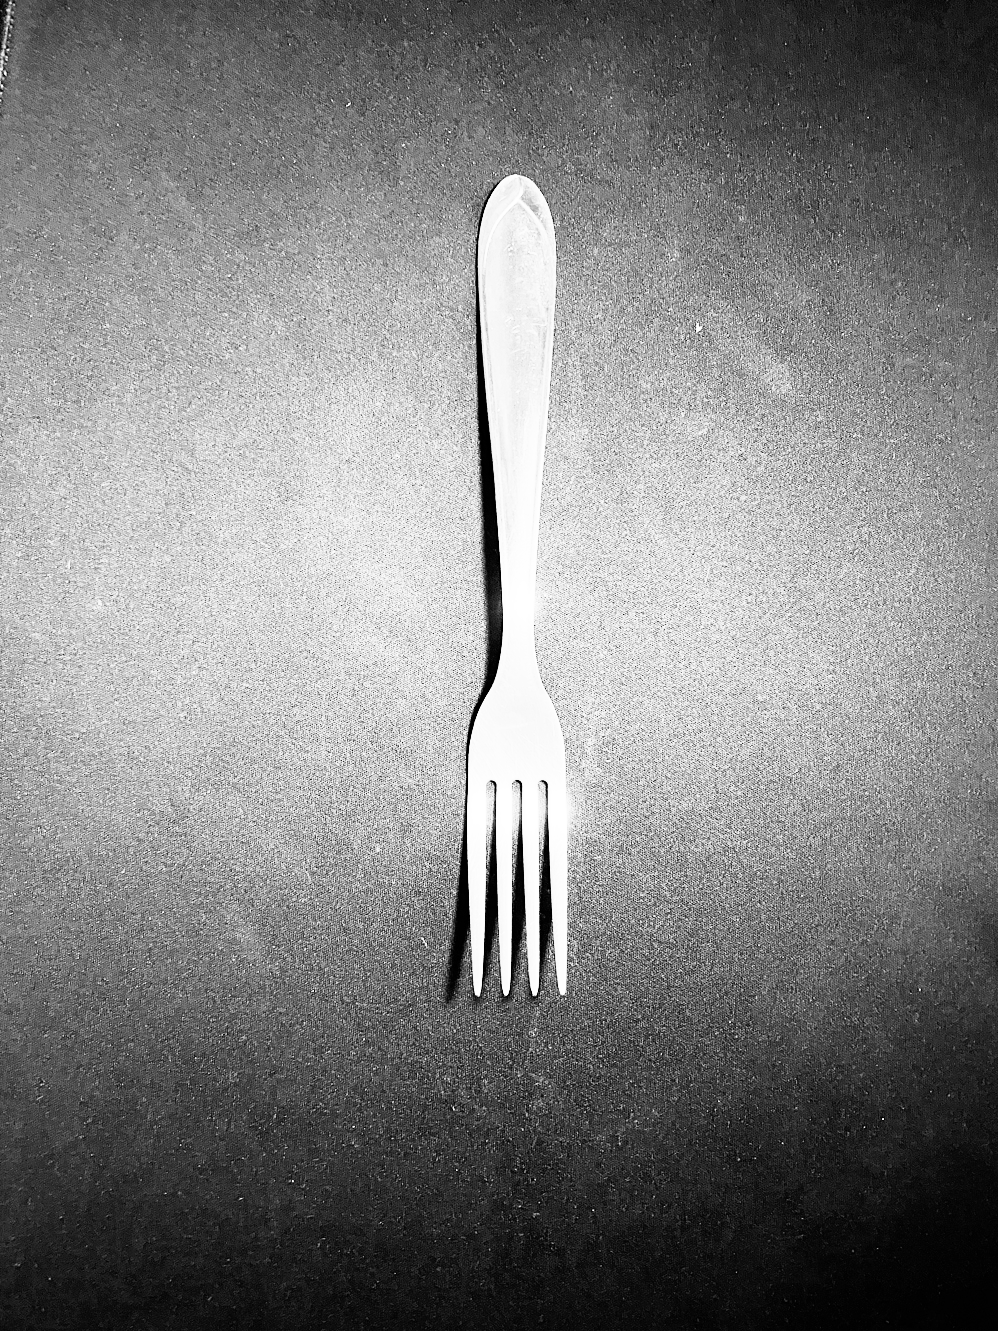

In [ ]:
#@title Acessando imagens equalizadas nas variáveis
# Classe 0 - can_opener
can_opener_V1_B_eq = cv2.imread('/content/Data_images/can_opener/Eq/0-01-V1-B_eq.png',0)
can_opener_V1_B_log_eq = cv2.imread('/content/Data_images/can_opener/Eq/0-01-V1-B_log_eq.png',0)
can_opener_V1_B_mean_eq = cv2.imread('/content/Data_images/can_opener/Eq/0-01-V1-B_mean_eq.png',0)
can_opener_V1_B_power_eq = cv2.imread('/content/Data_images/can_opener/Eq/0-01-V1-B_power_eq.png',0)

can_opener_V1_W_eq = cv2.imread('/content/Data_images/can_opener/Eq/0-01-V1-W_eq.png',0)
can_opener_V1_W_log_eq = cv2.imread('/content/Data_images/can_opener/Eq/0-01-V1-W_log_eq.png',0)
can_opener_V1_W_mean_eq = cv2.imread('/content/Data_images/can_opener/Eq/0-01-V1-W_mean_eq.png',0)
can_opener_V1_W_power_eq = cv2.imread('/content/Data_images/can_opener/Eq/0-01-V1-W_power_eq.png',0)

can_opener_V2_B_eq = cv2.imread('/content/Data_images/can_opener/Eq/0-01-V2-B_eq.png',0)
can_opener_V2_B_log_eq = cv2.imread('/content/Data_images/can_opener/Eq/0-01-V2-B_log_eq.png',0)
can_opener_V2_B_mean_eq = cv2.imread('/content/Data_images/can_opener/Eq/0-01-V2-B_mean_eq.png',0)
can_opener_V2_B_power_eq = cv2.imread('/content/Data_images/can_opener/Eq/0-01-V2-B_power_eq.png',0)

can_opener_V2_W_eq = cv2.imread('/content/Data_images/can_opener/Eq/0-01-V2-W_eq.png',0)
can_opener_V2_W_log_eq = cv2.imread('/content/Data_images/can_opener/Eq/0-01-V2-W_log_eq.png',0)
can_opener_V2_W_mean_eq = cv2.imread('/content/Data_images/can_opener/Eq/0-01-V2-W_mean_eq.png',0)
can_opener_V2_W_power_eq = cv2.imread('/content/Data_images/can_opener/Eq/0-01-V2-W_power_eq.png',0)

# Classe 1 - cork_screw
cork_screw_V1_B_eq = cv2.imread('/content/Data_images/cork_screw/Eq/1-01-V1-B_eq.png',0)
cork_screw_V1_B_log_eq = cv2.imread('/content/Data_images/cork_screw/Eq/1-01-V1-B_log_eq.png',0)
cork_screw_V1_B_mean_eq = cv2.imread('/content/Data_images/cork_screw/Eq/1-01-V1-B_mean_eq.png',0)
cork_screw_V1_B_power_eq = cv2.imread('/content/Data_images/cork_screw/Eq/1-01-V1-B_power_eq.png',0)

cork_screw_V1_W_eq = cv2.imread('/content/Data_images/cork_screw/Eq/1-01-V1-W_eq.png',0)
cork_screw_V1_W_log_eq = cv2.imread('/content/Data_images/cork_screw/Eq/1-01-V1-W_log_eq.png',0)
cork_screw_V1_W_mean_eq = cv2.imread('/content/Data_images/cork_screw/Eq/1-01-V1-W_mean_eq.png',0)
cork_screw_V1_W_power_eq = cv2.imread('/content/Data_images/cork_screw/Eq/1-01-V1-W_power_eq.png',0)

cork_screw_V2_B_eq = cv2.imread('/content/Data_images/cork_screw/Eq/1-01-V2-B_eq.png',0)
cork_screw_V2_B_log_eq = cv2.imread('/content/Data_images/cork_screw/Eq/1-01-V2-B_log_eq.png',0)
cork_screw_V2_B_mean_eq = cv2.imread('/content/Data_images/cork_screw/Eq/1-01-V2-B_mean_eq.png',0)
cork_screw_V2_B_power_eq = cv2.imread('/content/Data_images/cork_screw/Eq/1-01-V2-B_power_eq.png',0)

cork_screw_V2_W_eq = cv2.imread('/content/Data_images/cork_screw/Eq/1-01-V2-W_eq.png',0)
cork_screw_V2_W_log_eq = cv2.imread('/content/Data_images/cork_screw/Eq/1-01-V2-W_log_eq.png',0)
cork_screw_V2_W_mean_eq = cv2.imread('/content/Data_images/cork_screw/Eq/1-01-V2-W_mean_eq.png',0)
cork_screw_V2_W_power_eq = cv2.imread('/content/Data_images/cork_screw/Eq/1-01-V2-W_power_eq.png',0)

# Classe 2 - fork
fork_V1_B_eq = cv2.imread('/content/Data_images/fork/Eq/2-01-V1-B_eq.png',0)
fork_V1_B_log_eq = cv2.imread('/content/Data_images/fork/Eq/2-01-V1-B_log_eq.png',0)
fork_V1_B_mean_eq = cv2.imread('/content/Data_images/fork/Eq/2-01-V1-B_mean_eq.png',0)
fork_V1_B_power_eq = cv2.imread('/content/Data_images/fork/Eq/2-01-V1-B_power_eq.png',0)

fork_V1_W_eq = cv2.imread('/content/Data_images/fork/Eq/2-01-V1-W_eq.png',0)
fork_V1_W_log_eq = cv2.imread('/content/Data_images/fork/Eq/2-01-V1-W_log_eq.png',0)
fork_V1_W_mean_eq = cv2.imread('/content/Data_images/fork/Eq/2-01-V1-W_mean_eq.png',0)
fork_V1_W_power_eq = cv2.imread('/content/Data_images/fork/Eq/2-01-V1-W_power_eq.png',0)

fork_V2_B_eq = cv2.imread('/content/Data_images/fork/Eq/2-01-V2-B_eq.png',0)
fork_V2_B_log_eq = cv2.imread('/content/Data_images/fork/Eq/2-01-V2-B_log_eq.png',0)
fork_V2_B_mean_eq = cv2.imread('/content/Data_images/fork/Eq/2-01-V2-B_mean_eq.png',0)
fork_V2_B_power_eq = cv2.imread('/content/Data_images/fork/Eq/2-01-V2-B_power_eq.png',0)

fork_V2_W_eq = cv2.imread('/content/Data_images/fork/Eq/2-01-V2-W_eq.png',0)
fork_V2_W_log_eq = cv2.imread('/content/Data_images/fork/Eq/2-01-V2-W_log_eq.png',0)
fork_V2_W_mean_eq = cv2.imread('/content/Data_images/fork/Eq/2-01-V2-W_mean_eq.png',0)
fork_V2_W_power_eq = cv2.imread('/content/Data_images/fork/Eq/2-01-V2-W_power_eq.png',0)

# Classe 3 - garlic_squeezer
garlic_squeezer_V1_B_eq = cv2.imread('/content/Data_images/garlic_squeezer/Eq/3-01-V1-B_eq.png',0)
garlic_squeezer_V1_B_log_eq = cv2.imread('/content/Data_images/garlic_squeezer/Eq/3-01-V1-B_log_eq.png',0)
garlic_squeezer_V1_B_mean_eq = cv2.imread('/content/Data_images/garlic_squeezer/Eq/3-01-V1-B_mean_eq.png',0)
garlic_squeezer_V1_B_power_eq = cv2.imread('/content/Data_images/garlic_squeezer/Eq/3-01-V1-B_power_eq.png',0)

garlic_squeezer_V1_W_eq = cv2.imread('/content/Data_images/garlic_squeezer/Eq/3-01-V1-W_eq.png',0)
garlic_squeezer_V1_W_log_eq = cv2.imread('/content/Data_images/garlic_squeezer/Eq/3-01-V1-W_log_eq.png',0)
garlic_squeezer_V1_W_mean_eq = cv2.imread('/content/Data_images/garlic_squeezer/Eq/3-01-V1-W_mean_eq.png',0)
garlic_squeezer_V1_W_power_eq = cv2.imread('/content/Data_images/garlic_squeezer/Eq/3-01-V1-W_power_eq.png',0)

garlic_squeezer_V2_B_eq = cv2.imread('/content/Data_images/garlic_squeezer/Eq/3-01-V2-B_eq.png',0)
garlic_squeezer_V2_B_log_eq = cv2.imread('/content/Data_images/garlic_squeezer/Eq/3-01-V2-B_log_eq.png',0)
garlic_squeezer_V2_B_mean_eq = cv2.imread('/content/Data_images/garlic_squeezer/Eq/3-01-V2-B_mean_eq.png',0)
garlic_squeezer_V2_B_power_eq = cv2.imread('/content/Data_images/garlic_squeezer/Eq/3-01-V2-B_power_eq.png',0)

garlic_squeezer_V2_W_eq = cv2.imread('/content/Data_images/garlic_squeezer/Eq/3-01-V2-W_eq.png',0)
garlic_squeezer_V2_W_log_eq = cv2.imread('/content/Data_images/garlic_squeezer/Eq/3-01-V2-W_log_eq.png',0)
garlic_squeezer_V2_W_mean_eq = cv2.imread('/content/Data_images/garlic_squeezer/Eq/3-01-V2-W_mean_eq.png',0)
garlic_squeezer_V2_W_power_eq = cv2.imread('/content/Data_images/garlic_squeezer/Eq/3-01-V2-W_power_eq.png',0)

# Classe 4 - knife
knife_V1_B_eq = cv2.imread('/content/Data_images/knife/Eq/4-01-V1-B_eq.png',0)
knife_V1_B_log_eq = cv2.imread('/content/Data_images/knife/Eq/4-01-V1-B_log_eq.png',0)
knife_V1_B_mean_eq = cv2.imread('/content/Data_images/knife/Eq/4-01-V1-B_mean_eq.png',0)
knife_V1_B_power_eq = cv2.imread('/content/Data_images/knife/Eq/4-01-V1-B_power_eq.png',0)

knife_V1_W_eq = cv2.imread('/content/Data_images/knife/Eq/4-01-V1-W_eq.png',0)
knife_V1_W_log_eq = cv2.imread('/content/Data_images/knife/Eq/4-01-V1-W_log_eq.png',0)
knife_V1_W_mean_eq = cv2.imread('/content/Data_images/knife/Eq/4-01-V1-W_mean_eq.png',0)
knife_V1_W_power_eq = cv2.imread('/content/Data_images/knife/Eq/4-01-V1-W_power_eq.png',0)

knife_V2_B_eq = cv2.imread('/content/Data_images/knife/Eq/4-01-V2-B_eq.png',0)
knife_V2_B_log_eq = cv2.imread('/content/Data_images/knife/Eq/4-01-V2-B_log_eq.png',0)
knife_V2_B_mean_eq = cv2.imread('/content/Data_images/knife/Eq/4-01-V2-B_mean_eq.png',0)
knife_V2_B_power_eq = cv2.imread('/content/Data_images/knife/Eq/4-01-V2-B_power_eq.png',0)

knife_V2_W_eq = cv2.imread('/content/Data_images/knife/Eq/4-01-V2-W_eq.png',0)
knife_V2_W_log_eq = cv2.imread('/content/Data_images/knife/Eq/4-01-V2-W_log_eq.png',0)
knife_V2_W_mean_eq = cv2.imread('/content/Data_images/knife/Eq/4-01-V2-W_mean_eq.png',0)
knife_V2_W_power_eq = cv2.imread('/content/Data_images/knife/Eq/4-01-V2-W_power_eq.png',0)

# Classe 5 - lemon_squeezer
lemon_squeezer_V1_B_eq = cv2.imread('/content/Data_images/lemon_squeezer/Eq/5-01-V1-B_eq.png',0)
lemon_squeezer_V1_B_log_eq = cv2.imread('/content/Data_images/lemon_squeezer/Eq/5-01-V1-B_log_eq.png',0)
lemon_squeezer_V1_B_mean_eq = cv2.imread('/content/Data_images/lemon_squeezer/Eq/5-01-V1-B_mean_eq.png',0)
lemon_squeezer_V1_B_power_eq = cv2.imread('/content/Data_images/lemon_squeezer/Eq/5-01-V1-B_power_eq.png',0)

lemon_squeezer_V1_W_eq = cv2.imread('/content/Data_images/lemon_squeezer/Eq/5-01-V1-W_eq.png',0)
lemon_squeezer_V1_W_log_eq = cv2.imread('/content/Data_images/lemon_squeezer/Eq/5-01-V1-W_log_eq.png',0)
lemon_squeezer_V1_W_mean_eq = cv2.imread('/content/Data_images/lemon_squeezer/Eq/5-01-V1-W_mean_eq.png',0)
lemon_squeezer_V1_W_power_eq = cv2.imread('/content/Data_images/lemon_squeezer/Eq/5-01-V1-W_power_eq.png',0)

lemon_squeezer_V2_B_eq = cv2.imread('/content/Data_images/lemon_squeezer/Eq/5-01-V2-B_eq.png',0)
lemon_squeezer_V2_B_log_eq = cv2.imread('/content/Data_images/lemon_squeezer/Eq/5-01-V2-B_log_eq.png',0)
lemon_squeezer_V2_B_mean_eq = cv2.imread('/content/Data_images/lemon_squeezer/Eq/5-01-V2-B_mean_eq.png',0)
lemon_squeezer_V2_B_power_eq = cv2.imread('/content/Data_images/lemon_squeezer/Eq/5-01-V2-B_power_eq.png',0)

lemon_squeezer_V2_W_eq = cv2.imread('/content/Data_images/lemon_squeezer/Eq/5-01-V2-W_eq.png',0)
lemon_squeezer_V2_W_log_eq = cv2.imread('/content/Data_images/lemon_squeezer/Eq/5-01-V2-W_log_eq.png',0)
lemon_squeezer_V2_W_mean_eq = cv2.imread('/content/Data_images/lemon_squeezer/Eq/5-01-V2-W_mean_eq.png',0)
lemon_squeezer_V2_W_power_eq = cv2.imread('/content/Data_images/lemon_squeezer/Eq/5-01-V2-W_power_eq.png',0)

# Classe 6 - noodle_tong
noodle_tong_V1_B_eq = cv2.imread('/content/Data_images/noodle_tong/Eq/6-01-V1-B_eq.png',0)
noodle_tong_V1_B_log_eq = cv2.imread('/content/Data_images/noodle_tong/Eq/6-01-V1-B_log_eq.png',0)
noodle_tong_V1_B_mean_eq = cv2.imread('/content/Data_images/noodle_tong/Eq/6-01-V1-B_mean_eq.png',0)
noodle_tong_V1_B_power_eq = cv2.imread('/content/Data_images/noodle_tong/Eq/6-01-V1-B_power_eq.png',0)

noodle_tong_V1_W_eq = cv2.imread('/content/Data_images/noodle_tong/Eq/6-01-V1-W_eq.png',0)
noodle_tong_V1_W_log_eq = cv2.imread('/content/Data_images/noodle_tong/Eq/6-01-V1-W_log_eq.png',0)
noodle_tong_V1_W_mean_eq = cv2.imread('/content/Data_images/noodle_tong/Eq/6-01-V1-W_mean_eq.png',0)
noodle_tong_V1_W_power_eq = cv2.imread('/content/Data_images/noodle_tong/Eq/6-01-V1-W_power_eq.png',0)

noodle_tong_V2_B_eq = cv2.imread('/content/Data_images/noodle_tong/Eq/6-01-V2-B_eq.png',0)
noodle_tong_V2_B_log_eq = cv2.imread('/content/Data_images/noodle_tong/Eq/6-01-V2-B_log_eq.png',0)
noodle_tong_V2_B_mean_eq = cv2.imread('/content/Data_images/noodle_tong/Eq/6-01-V2-B_mean_eq.png',0)
noodle_tong_V2_B_power_eq = cv2.imread('/content/Data_images/noodle_tong/Eq/6-01-V2-B_power_eq.png',0)

noodle_tong_V2_W_eq = cv2.imread('/content/Data_images/noodle_tong/Eq/6-01-V2-W_eq.png',0)
noodle_tong_V2_W_log_eq = cv2.imread('/content/Data_images/noodle_tong/Eq/6-01-V2-W_log_eq.png',0)
noodle_tong_V2_W_mean_eq = cv2.imread('/content/Data_images/noodle_tong/Eq/6-01-V2-W_mean_eq.png',0)
noodle_tong_V2_W_power_eq = cv2.imread('/content/Data_images/noodle_tong/Eq/6-01-V2-W_power_eq.png',0)

# Classe 7 - scoop
scoop_V1_B_eq = cv2.imread('/content/Data_images/scoop/Eq/7-01-V1-B_eq.png',0)
scoop_V1_B_log_eq = cv2.imread('/content/Data_images/scoop/Eq/7-01-V1-B_log_eq.png',0)
scoop_V1_B_mean_eq = cv2.imread('/content/Data_images/scoop/Eq/7-01-V1-B_mean_eq.png',0)
scoop_V1_B_power_eq = cv2.imread('/content/Data_images/scoop/Eq/7-01-V1-B_power_eq.png',0)

scoop_V1_W_eq = cv2.imread('/content/Data_images/scoop/Eq/7-01-V1-W_eq.png',0)
scoop_V1_W_log_eq = cv2.imread('/content/Data_images/scoop/Eq/7-01-V1-W_log_eq.png',0)
scoop_V1_W_mean_eq = cv2.imread('/content/Data_images/scoop/Eq/7-01-V1-W_mean_eq.png',0)
scoop_V1_W_power_eq = cv2.imread('/content/Data_images/scoop/Eq/7-01-V1-W_power_eq.png',0)

scoop_V2_B_eq = cv2.imread('/content/Data_images/scoop/Eq/7-01-V2-B_eq.png',0)
scoop_V2_B_log_eq = cv2.imread('/content/Data_images/scoop/Eq/7-01-V2-B_log_eq.png',0)
scoop_V2_B_mean_eq = cv2.imread('/content/Data_images/scoop/Eq/7-01-V2-B_mean_eq.png',0)
scoop_V2_B_power_eq = cv2.imread('/content/Data_images/scoop/Eq/7-01-V2-B_power_eq.png',0)

scoop_V2_W_eq = cv2.imread('/content/Data_images/scoop/Eq/7-01-V2-W_eq.png',0)
scoop_V2_W_log_eq = cv2.imread('/content/Data_images/scoop/Eq/7-01-V2-W_log_eq.png',0)
scoop_V2_W_mean_eq = cv2.imread('/content/Data_images/scoop/Eq/7-01-V2-W_mean_eq.png',0)
scoop_V2_W_power_eq = cv2.imread('/content/Data_images/scoop/Eq/7-01-V2-W_power_eq.png',0)

# Classe 8 - spatula
spatula_V1_B_eq = cv2.imread('/content/Data_images/spatula/Eq/8-01-V1-B_eq.png',0)
spatula_V1_B_log_eq = cv2.imread('/content/Data_images/spatula/Eq/8-01-V1-B_log_eq.png',0)
spatula_V1_B_mean_eq = cv2.imread('/content/Data_images/spatula/Eq/8-01-V1-B_mean_eq.png',0)
spatula_V1_B_power_eq = cv2.imread('/content/Data_images/spatula/Eq/8-01-V1-B_power_eq.png',0)

spatula_V1_W_eq = cv2.imread('/content/Data_images/spatula/Eq/8-01-V1-W_eq.png',0)
spatula_V1_W_log_eq = cv2.imread('/content/Data_images/spatula/Eq/8-01-V1-W_log_eq.png',0)
spatula_V1_W_mean_eq = cv2.imread('/content/Data_images/spatula/Eq/8-01-V1-W_mean_eq.png',0)
spatula_V1_W_power_eq = cv2.imread('/content/Data_images/spatula/Eq/8-01-V1-W_power_eq.png',0)

spatula_V2_B_eq = cv2.imread('/content/Data_images/spatula/Eq/8-01-V2-B_eq.png',0)
spatula_V2_B_log_eq = cv2.imread('/content/Data_images/spatula/Eq/8-01-V2-B_log_eq.png',0)
spatula_V2_B_mean_eq = cv2.imread('/content/Data_images/spatula/Eq/8-01-V2-B_mean_eq.png',0)
spatula_V2_B_power_eq = cv2.imread('/content/Data_images/spatula/Eq/8-01-V2-B_power_eq.png',0)

spatula_V2_W_eq = cv2.imread('/content/Data_images/spatula/Eq/8-01-V2-W_eq.png',0)
spatula_V2_W_log_eq = cv2.imread('/content/Data_images/spatula/Eq/8-01-V2-W_log_eq.png',0)
spatula_V2_W_mean_eq = cv2.imread('/content/Data_images/spatula/Eq/8-01-V2-W_mean_eq.png',0)
spatula_V2_W_power_eq = cv2.imread('/content/Data_images/spatula/Eq/8-01-V2-W_power_eq.png',0)

# Classe 9 - spoon
spoon_V1_B_eq = cv2.imread('/content/Data_images/spoon/Eq/9-01-V1-B_eq.png',0)
spoon_V1_B_log_eq = cv2.imread('/content/Data_images/spoon/Eq/9-01-V1-B_log_eq.png',0)
spoon_V1_B_mean_eq = cv2.imread('/content/Data_images/spoon/Eq/9-01-V1-B_mean_eq.png',0)
spoon_V1_B_power_eq = cv2.imread('/content/Data_images/spoon/Eq/9-01-V1-B_power_eq.png',0)

spoon_V1_W_eq = cv2.imread('/content/Data_images/spoon/Eq/9-01-V1-W_eq.png',0)
spoon_V1_W_log_eq = cv2.imread('/content/Data_images/spoon/Eq/9-01-V1-W_log_eq.png',0)
spoon_V1_W_mean_eq = cv2.imread('/content/Data_images/spoon/Eq/9-01-V1-W_mean_eq.png',0)
spoon_V1_W_power_eq = cv2.imread('/content/Data_images/spoon/Eq/9-01-V1-W_power_eq.png',0)

spoon_V2_B_eq = cv2.imread('/content/Data_images/spoon/Eq/9-01-V2-B_eq.png',0)
spoon_V2_B_log_eq = cv2.imread('/content/Data_images/spoon/Eq/9-01-V2-B_log_eq.png',0)
spoon_V2_B_mean_eq = cv2.imread('/content/Data_images/spoon/Eq/9-01-V2-B_mean_eq.png',0)
spoon_V2_B_power_eq = cv2.imread('/content/Data_images/spoon/Eq/9-01-V2-B_power_eq.png',0)

spoon_V2_W_eq = cv2.imread('/content/Data_images/spoon/Eq/9-01-V2-W_eq.png',0)
spoon_V2_W_log_eq = cv2.imread('/content/Data_images/spoon/Eq/9-01-V2-W_log_eq.png',0)
spoon_V2_W_mean_eq = cv2.imread('/content/Data_images/spoon/Eq/9-01-V2-W_mean_eq.png',0)
spoon_V2_W_power_eq = cv2.imread('/content/Data_images/spoon/Eq/9-01-V2-W_power_eq.png',0)

# Estruturas de dados auxiliares
classe_0_eq = ['0-01-V1-B_eq',can_opener_V1_B_eq, 
            '0-01-V1-W_eq',can_opener_V1_W_eq, 
            '0-01-V2-B_eq',can_opener_V2_B_eq, 
            '0-01-V2-W_eq',can_opener_V2_W_eq,
            '0-01-V1-B_log_eq',can_opener_V1_B_log_eq, 
            '0-01-V1-W_log_eq',can_opener_V1_W_log_eq, 
            '0-01-V2-B_log_eq',can_opener_V2_B_log_eq, 
            '0-01-V2-W_log_eq',can_opener_V2_W_log_eq,
            '0-01-V1-B_mean_eq',can_opener_V1_B_mean_eq, 
            '0-01-V1-W_mean_eq',can_opener_V1_W_mean_eq, 
            '0-01-V2-B_mean_eq',can_opener_V2_B_mean_eq, 
            '0-01-V2-W_mean_eq',can_opener_V2_W_mean_eq,
            '0-01-V1-B_power_eq',can_opener_V1_B_power_eq, 
            '0-01-V1-W_power_eq',can_opener_V1_W_power_eq, 
            '0-01-V2-B_power_eq',can_opener_V2_B_power_eq, 
            '0-01-V2-W_power_eq',can_opener_V2_W_power_eq]
    
classe_1_eq = ['1-01-V1-B_eq',cork_screw_V1_B_eq,
            '1-01-V1-W_eq',cork_screw_V1_W_eq,
            '1-01-V2-B_eq',cork_screw_V2_B_eq,
            '1-01-V2-W_eq',cork_screw_V2_W_eq,
            '1-01-V1-B_log_eq',cork_screw_V1_B_log_eq,
            '1-01-V1-W_log_eq',cork_screw_V1_W_log_eq,
            '1-01-V2-B_log_eq',cork_screw_V2_B_log_eq,
            '1-01-V2-W_log_eq',cork_screw_V2_W_log_eq,
            '1-01-V1-B_mean_eq',cork_screw_V1_B_mean_eq,
            '1-01-V1-W_mean_eq',cork_screw_V1_W_mean_eq,
            '1-01-V2-B_mean_eq',cork_screw_V2_B_mean_eq,
            '1-01-V2-W_mean_eq',cork_screw_V2_W_mean_eq,
            '1-01-V1-B_power_eq',cork_screw_V1_B_power_eq,
            '1-01-V1-W_power_eq',cork_screw_V1_W_power_eq,
            '1-01-V2-B_power_eq',cork_screw_V2_B_power_eq,
            '1-01-V2-W_power_eq',cork_screw_V2_W_power_eq]

classe_2_eq = ['2-01-V1-B_eq',fork_V1_B_eq, 
            '2-01-V1-W_eq',fork_V1_W_eq, 
            '2-01-V2-B_eq',fork_V2_B_eq, 
            '2-01-V2-W_eq',fork_V2_W_eq,
            '2-01-V1-B_log_eq',fork_V1_B_log_eq, 
            '2-01-V1-W_log_eq',fork_V1_W_log_eq, 
            '2-01-V2-B_log_eq',fork_V2_B_log_eq, 
            '2-01-V2-W_log_eq',fork_V2_W_log_eq,
            '2-01-V1-B_mean_eq',fork_V1_B_mean_eq, 
            '2-01-V1-W_mean_eq',fork_V1_W_mean_eq, 
            '2-01-V2-B_mean_eq',fork_V2_B_mean_eq, 
            '2-01-V2-W_mean_eq',fork_V2_W_mean_eq,
            '2-01-V1-B_power_eq',fork_V1_B_power_eq, 
            '2-01-V1-W_power_eq',fork_V1_W_power_eq, 
            '2-01-V2-B_power_eq',fork_V2_B_power_eq, 
            '2-01-V2-W_power_eq',fork_V2_W_power_eq]

classe_3_eq = ['3-01-V1-B_eq',garlic_squeezer_V1_B_eq, 
            '3-01-V1-W_eq',garlic_squeezer_V1_W_eq, 
            '3-01-V2-B_eq',garlic_squeezer_V2_B_eq, 
            '3-01-V2-W_eq',garlic_squeezer_V2_W_eq,
            '3-01-V1-B_log_eq',garlic_squeezer_V1_B_log_eq, 
            '3-01-V1-W_log_eq',garlic_squeezer_V1_W_log_eq, 
            '3-01-V2-B_log_eq',garlic_squeezer_V2_B_log_eq, 
            '3-01-V2-W_log_eq',garlic_squeezer_V2_W_log_eq,
            '3-01-V1-B_mean_eq',garlic_squeezer_V1_B_mean_eq, 
            '3-01-V1-W_mean_eq',garlic_squeezer_V1_W_mean_eq, 
            '3-01-V2-B_mean_eq',garlic_squeezer_V2_B_mean_eq, 
            '3-01-V2-W_mean_eq',garlic_squeezer_V2_W_mean_eq,
            '3-01-V1-B_power_eq',garlic_squeezer_V1_B_power_eq, 
            '3-01-V1-W_power_eq',garlic_squeezer_V1_W_power_eq, 
            '3-01-V2-B_power_eq',garlic_squeezer_V2_B_power_eq, 
            '3-01-V2-W_power_eq',garlic_squeezer_V2_W_power_eq]

classe_4_eq = ['4-01-V1-B_eq',knife_V1_B_eq, 
            '4-01-V1-W_eq',knife_V1_W_eq, 
            '4-01-V2-B_eq',knife_V2_B_eq, 
            '4-01-V2-W_eq',knife_V2_W_eq,
            '4-01-V1-B_log_eq',knife_V1_B_log_eq, 
            '4-01-V1-W_log_eq',knife_V1_W_log_eq, 
            '4-01-V2-B_log_eq',knife_V2_B_log_eq, 
            '4-01-V2-W_log_eq',knife_V2_W_log_eq,
            '4-01-V1-B_mean_eq',knife_V1_B_mean_eq, 
            '4-01-V1-W_mean_eq',knife_V1_W_mean_eq, 
            '4-01-V2-B_mean_eq',knife_V2_B_mean_eq, 
            '4-01-V2-W_mean_eq',knife_V2_W_mean_eq,
            '4-01-V1-B_power_eq',knife_V1_B_power_eq, 
            '4-01-V1-W_power_eq',knife_V1_W_power_eq, 
            '4-01-V2-B_power_eq',knife_V2_B_power_eq, 
            '4-01-V2-W_power_eq',knife_V2_W_power_eq]

classe_5_eq = ['5-01-V1-B_eq',lemon_squeezer_V1_B_eq, 
            '5-01-V1-W_eq',lemon_squeezer_V1_W_eq, 
            '5-01-V2-B_eq',lemon_squeezer_V2_B_eq, 
            '5-01-V2-W_eq',lemon_squeezer_V2_W_eq,
            '5-01-V1-B_log_eq',lemon_squeezer_V1_B_log_eq, 
            '5-01-V1-W_log_eq',lemon_squeezer_V1_W_log_eq, 
            '5-01-V2-B_log_eq',lemon_squeezer_V2_B_log_eq, 
            '5-01-V2-W_log_eq',lemon_squeezer_V2_W_log_eq,
            '5-01-V1-B_mean_eq',lemon_squeezer_V1_B_mean_eq, 
            '5-01-V1-W_mean_eq',lemon_squeezer_V1_W_mean_eq, 
            '5-01-V2-B_mean_eq',lemon_squeezer_V2_B_mean_eq, 
            '5-01-V2-W_mean_eq',lemon_squeezer_V2_W_mean_eq,
            '5-01-V1-B_power_eq',lemon_squeezer_V1_B_power_eq, 
            '5-01-V1-W_power_eq',lemon_squeezer_V1_W_power_eq, 
            '5-01-V2-B_power_eq',lemon_squeezer_V2_B_power_eq, 
            '5-01-V2-W_power_eq',lemon_squeezer_V2_W_power_eq]

classe_6_eq = ['6-01-V1-B_eq',noodle_tong_V1_B_eq, 
            '6-01-V1-W_eq',noodle_tong_V1_W_eq, 
            '6-01-V2-B_eq',noodle_tong_V2_B_eq, 
            '6-01-V2-W_eq',noodle_tong_V2_W_eq,
            '6-01-V1-B_log_eq',noodle_tong_V1_B_log_eq, 
            '6-01-V1-W_log_eq',noodle_tong_V1_W_log_eq, 
            '6-01-V2-B_log_eq',noodle_tong_V2_B_log_eq, 
            '6-01-V2-W_log_eq',noodle_tong_V2_W_log_eq,
            '6-01-V1-B_mean_eq',noodle_tong_V1_B_mean_eq, 
            '6-01-V1-W_mean_eq',noodle_tong_V1_W_mean_eq, 
            '6-01-V2-B_mean_eq',noodle_tong_V2_B_mean_eq, 
            '6-01-V2-W_mean_eq',noodle_tong_V2_W_mean_eq,
            '6-01-V1-B_power_eq',noodle_tong_V1_B_power_eq, 
            '6-01-V1-W_power_eq',noodle_tong_V1_W_power_eq, 
            '6-01-V2-B_power_eq',noodle_tong_V2_B_power_eq, 
            '6-01-V2-W_power_eq',noodle_tong_V2_W_power_eq]

classe_7_eq = ['7-01-V1-B_eq',scoop_V1_B_eq, 
            '7-01-V1-W_eq',scoop_V1_W_eq, 
            '7-01-V2-B_eq',scoop_V2_B_eq, 
            '7-01-V2-W_eq',scoop_V2_W_eq,
            '7-01-V1-B_log_eq',scoop_V1_B_log_eq, 
            '7-01-V1-W_log_eq',scoop_V1_W_log_eq, 
            '7-01-V2-B_log_eq',scoop_V2_B_log_eq, 
            '7-01-V2-W_log_eq',scoop_V2_W_log_eq,
            '7-01-V1-B_mean_eq',scoop_V1_B_mean_eq, 
            '7-01-V1-W_mean_eq',scoop_V1_W_mean_eq, 
            '7-01-V2-B_mean_eq',scoop_V2_B_mean_eq, 
            '7-01-V2-W_mean_eq',scoop_V2_W_mean_eq,
            '7-01-V1-B_power_eq',scoop_V1_B_power_eq, 
            '7-01-V1-W_power_eq',scoop_V1_W_power_eq, 
            '7-01-V2-B_power_eq',scoop_V2_B_power_eq, 
            '7-01-V2-W_power_eq',scoop_V2_W_power_eq]

classe_8_eq = ['8-01-V1-B_eq',spatula_V1_B_eq, 
            '8-01-V1-W_eq',spatula_V1_W_eq, 
            '8-01-V2-B_eq',spatula_V2_B_eq, 
            '8-01-V2-W_eq',spatula_V2_W_eq,
            '8-01-V1-B_log_eq',spatula_V1_B_log_eq, 
            '8-01-V1-W_log_eq',spatula_V1_W_log_eq, 
            '8-01-V2-B_log_eq',spatula_V2_B_log_eq, 
            '8-01-V2-W_log_eq',spatula_V2_W_log_eq,
            '8-01-V1-B_mean_eq',spatula_V1_B_mean_eq, 
            '8-01-V1-W_mean_eq',spatula_V1_W_mean_eq, 
            '8-01-V2-B_mean_eq',spatula_V2_B_mean_eq, 
            '8-01-V2-W_mean_eq',spatula_V2_W_mean_eq,
            '8-01-V1-B_power_eq',spatula_V1_B_power_eq, 
            '8-01-V1-W_power_eq',spatula_V1_W_power_eq, 
            '8-01-V2-B_power_eq',spatula_V2_B_power_eq, 
            '8-01-V2-W_power_eq',spatula_V2_W_power_eq]

classe_9_eq = ['9-01-V1-B_eq',spoon_V1_B_eq, 
            '9-01-V1-W_eq',spoon_V1_W_eq, 
            '9-01-V2-B_eq',spoon_V2_B_eq, 
            '9-01-V2-W_eq',spoon_V2_W_eq,
            '9-01-V1-B_log_eq',spoon_V1_B_log_eq, 
            '9-01-V1-W_log_eq',spoon_V1_W_log_eq, 
            '9-01-V2-B_log_eq',spoon_V2_B_log_eq, 
            '9-01-V2-W_log_eq',spoon_V2_W_log_eq,
            '9-01-V1-B_mean_eq',spoon_V1_B_mean_eq, 
            '9-01-V1-W_mean_eq',spoon_V1_W_mean_eq, 
            '9-01-V2-B_mean_eq',spoon_V2_B_mean_eq, 
            '9-01-V2-W_mean_eq',spoon_V2_W_mean_eq,
            '9-01-V1-B_power_eq',spoon_V1_B_power_eq, 
            '9-01-V1-W_power_eq',spoon_V1_W_power_eq, 
            '9-01-V2-B_power_eq',spoon_V2_B_power_eq, 
            '9-01-V2-W_power_eq',spoon_V2_W_power_eq]

print('A título de exemplo, é apresentado a imagem 2-01-V1-B equalizada')
cv2_imshow(fork_V1_B_eq)

A título de exemplo, é apresentado o protótipo médio da classe 2 (Fork)


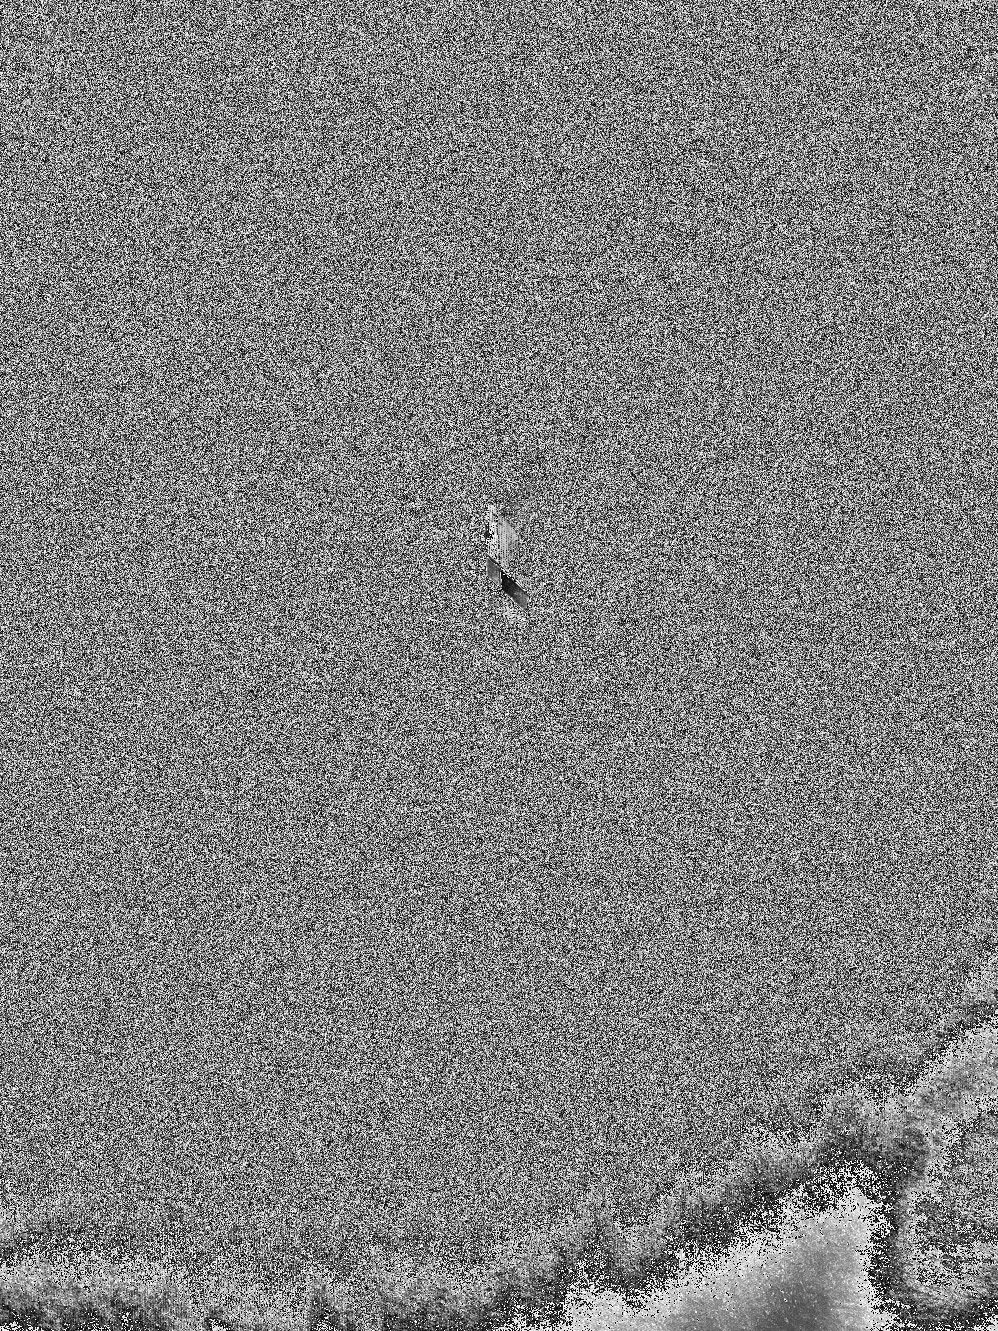

In [ ]:
#@title Prototipo médio da classe

# Somar todas as imagens e dividir pelo número de imagens
#Classe 0
Mean_prototype = (classe_0_eq[1] + classe_0_eq[3] + classe_0_eq[5] + classe_0_eq[7] + classe_0_eq[9] + classe_0_eq[11] + classe_0_eq[13] + classe_0_eq[15] + classe_0_eq[17] + classe_0_eq[19] + classe_0_eq[21] + classe_0_eq[23] + classe_0_eq[25] + classe_0_eq[27] + classe_0_eq[29] + classe_0_eq[31])/16
io.imsave('/content/Data_images/can_opener/Eq/Class_MeanPrototype.png', Mean_prototype)

#Classe 1
Mean_prototype = (classe_1_eq[1] + classe_1_eq[3] + classe_1_eq[5] + classe_1_eq[7] + classe_1_eq[9] + classe_1_eq[11] + classe_1_eq[13] + classe_1_eq[15] + classe_1_eq[17] + classe_1_eq[19] + classe_1_eq[21] + classe_1_eq[23] + classe_1_eq[25] + classe_1_eq[27] + classe_1_eq[29] + classe_1_eq[31])/16
io.imsave('/content/Data_images/cork_screw/Eq/Class_MeanPrototype.png', Mean_prototype)

#Classe 2
Mean_prototype = (classe_2_eq[1] + classe_2_eq[3] + classe_2_eq[5] + classe_2_eq[7] + classe_2_eq[9] + classe_2_eq[11] + classe_2_eq[13] + classe_2_eq[15] + classe_2_eq[17] + classe_2_eq[19] + classe_2_eq[21] + classe_2_eq[23] + classe_2_eq[25] + classe_2_eq[27] + classe_2_eq[29] + classe_2_eq[31])/16
io.imsave('/content/Data_images/fork/Eq/Class_MeanPrototype.png', Mean_prototype)

#Classe 3
Mean_prototype = (classe_3_eq[1] + classe_3_eq[3] + classe_3_eq[5] + classe_3_eq[7] + classe_3_eq[9] + classe_3_eq[11] + classe_3_eq[13] + classe_3_eq[15] + classe_3_eq[17] + classe_3_eq[19] + classe_3_eq[21] + classe_3_eq[23] + classe_3_eq[25] + classe_3_eq[27] + classe_3_eq[29] + classe_3_eq[31])/16
io.imsave('/content/Data_images/garlic_squeezer/Eq/Class_MeanPrototype.png', Mean_prototype)

#Classe 4
Mean_prototype = (classe_4_eq[1] + classe_4_eq[3] + classe_4_eq[5] + classe_4_eq[7] + classe_4_eq[9] + classe_4_eq[11] + classe_4_eq[13] + classe_4_eq[15] + classe_4_eq[17] + classe_4_eq[19] + classe_4_eq[21] + classe_4_eq[23] + classe_4_eq[25] + classe_4_eq[27] + classe_4_eq[29] + classe_4_eq[31])/16
io.imsave('/content/Data_images/knife/Eq/Class_MeanPrototype.png', Mean_prototype)

#Classe 5
Mean_prototype = (classe_5_eq[1] + classe_5_eq[3] + classe_5_eq[5] + classe_5_eq[7] + classe_5_eq[9] + classe_5_eq[11] + classe_5_eq[13] + classe_5_eq[15] + classe_5_eq[17] + classe_5_eq[19] + classe_5_eq[21] + classe_5_eq[23] + classe_5_eq[25] + classe_5_eq[27] + classe_5_eq[29] + classe_5_eq[31])/16
io.imsave('/content/Data_images/lemon_squeezer/Eq/Class_MeanPrototype.png', Mean_prototype)

#Classe 6
Mean_prototype = (classe_6_eq[1] + classe_6_eq[3] + classe_6_eq[5] + classe_6_eq[7] + classe_6_eq[9] + classe_6_eq[11] + classe_6_eq[13] + classe_6_eq[15] + classe_6_eq[17] + classe_6_eq[19] + classe_6_eq[21] + classe_6_eq[23] + classe_6_eq[25] + classe_6_eq[27] + classe_6_eq[29] + classe_6_eq[31])/16
io.imsave('/content/Data_images/noodle_tong/Eq/Class_MeanPrototype.png', Mean_prototype)

#Classe 7
Mean_prototype = (classe_7_eq[1] + classe_7_eq[3] + classe_7_eq[5] + classe_7_eq[7] + classe_7_eq[9] + classe_7_eq[11] + classe_7_eq[13] + classe_7_eq[15] + classe_7_eq[17] + classe_7_eq[19] + classe_7_eq[21] + classe_7_eq[23] + classe_7_eq[25] + classe_7_eq[27] + classe_7_eq[29] + classe_7_eq[31])/16
io.imsave('/content/Data_images/scoop/Eq/Class_MeanPrototype.png', Mean_prototype)

#Classe 8
Mean_prototype = (classe_8_eq[1] + classe_8_eq[3] + classe_8_eq[5] + classe_8_eq[7] + classe_8_eq[9] + classe_8_eq[11] + classe_8_eq[13] + classe_8_eq[15] + classe_8_eq[17] + classe_8_eq[19] + classe_8_eq[21] + classe_8_eq[23] + classe_8_eq[25] + classe_8_eq[27] + classe_8_eq[29] + classe_8_eq[31])/16
io.imsave('/content/Data_images/spatula/Eq/Class_MeanPrototype.png', Mean_prototype)

#Classe 9
Mean_prototype = (classe_9_eq[1] + classe_9_eq[3] + classe_9_eq[5] + classe_9_eq[7] + classe_9_eq[9] + classe_9_eq[11] + classe_9_eq[13] + classe_9_eq[15] + classe_9_eq[17] + classe_9_eq[19] + classe_9_eq[21] + classe_9_eq[23] + classe_9_eq[25] + classe_9_eq[27] + classe_9_eq[29] + classe_9_eq[31])/16
io.imsave('/content/Data_images/spoon/Eq/Class_MeanPrototype.png', Mean_prototype)

print('A título de exemplo, é apresentado o protótipo médio da classe 2 (Fork)')
fork_meanprototype = cv2.imread('/content/Data_images/fork/Eq/Class_MeanPrototype.png',0)
cv2_imshow(fork_meanprototype)

A título de exemplo, é apresentado Histrograma e a variância da classe 0 (Can Opener)


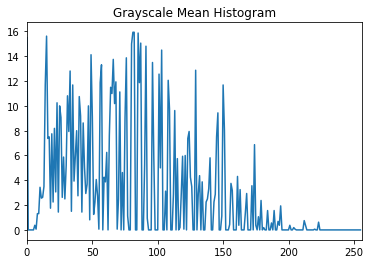

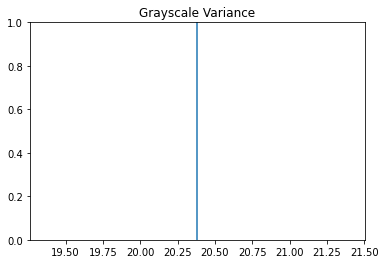

In [ ]:
#@title Histograma e Variância média de cada classe

for i in range(0,32):
  if i % 2 == 0:
    None
  else:
    Histogram = cv2.calcHist(classe_0_eq[i], [0], None, [256], [0,256])
    io.imsave('/content/Data_images/can_opener/Eq/Hist/' + classe_0_eq[i-1] +'_hist.png', Histogram) 

    Histogram = cv2.calcHist(classe_1_eq[i], [0], None, [256], [0,256])
    io.imsave('/content/Data_images/cork_screw/Eq/Hist/' + classe_1_eq[i-1] +'_hist.png', Histogram) 

    Histogram = cv2.calcHist(classe_2_eq[i], [0], None, [256], [0,256])
    io.imsave('/content/Data_images/fork/Eq/Hist/' + classe_2_eq[i-1] +'_hist.png', Histogram) 

    Histogram = cv2.calcHist(classe_3_eq[i], [0], None, [256], [0,256])
    io.imsave('/content/Data_images/garlic_squeezer/Eq/Hist/' + classe_3_eq[i-1] +'_hist.png', Histogram) 

    Histogram = cv2.calcHist(classe_4_eq[i], [0], None, [256], [0,256])
    io.imsave('/content/Data_images/knife/Eq/Hist/' + classe_4_eq[i-1] +'_hist.png', Histogram) 

    Histogram = cv2.calcHist(classe_5_eq[i], [0], None, [256], [0,256])
    io.imsave('/content/Data_images/lemon_squeezer/Eq/Hist/' + classe_5_eq[i-1] +'_hist.png', Histogram) 

    Histogram = cv2.calcHist(classe_6_eq[i], [0], None, [256], [0,256])
    io.imsave('/content/Data_images/noodle_tong/Eq/Hist/' + classe_6_eq[i-1] +'_hist.png', Histogram) 

    Histogram = cv2.calcHist(classe_7_eq[i], [0], None, [256], [0,256])
    io.imsave('/content/Data_images/scoop/Eq/Hist/' + classe_7_eq[i-1] +'_hist.png', Histogram) 

    Histogram = cv2.calcHist(classe_8_eq[i], [0], None, [256], [0,256])
    io.imsave('/content/Data_images/spatula/Eq/Hist/' + classe_8_eq[i-1] +'_hist.png', Histogram) 

    Histogram = cv2.calcHist(classe_9_eq[i], [0], None, [256], [0,256])
    io.imsave('/content/Data_images/spoon/Eq/Hist/' + classe_9_eq[i-1] +'_hist.png', Histogram)

#Classe 0 - can_opener
can_opener_V1_B_eq_hist       = cv2.imread('/content/Data_images/can_opener/Eq/Hist/0-01-V1-B_eq_hist.png',0)
can_opener_V1_B_log_eq_hist   = cv2.imread('/content/Data_images/can_opener/Eq/Hist/0-01-V1-B_log_eq_hist.png',0)
can_opener_V1_B_mean_eq_hist  = cv2.imread('/content/Data_images/can_opener/Eq/Hist/0-01-V1-B_mean_eq_hist.png',0)
can_opener_V1_B_power_eq_hist = cv2.imread('/content/Data_images/can_opener/Eq/Hist/0-01-V1-B_power_eq_hist.png',0)

can_opener_V1_W_eq_hist = cv2.imread('/content/Data_images/can_opener/Eq/Hist/0-01-V1-W_eq_hist.png',0)
can_opener_V1_W_log_eq_hist = cv2.imread('/content/Data_images/can_opener/Eq/Hist/0-01-V1-W_log_eq_hist.png',0)
can_opener_V1_W_mean_eq_hist = cv2.imread('/content/Data_images/can_opener/Eq/Hist/0-01-V1-W_mean_eq_hist.png',0)
can_opener_V1_W_power_eq_hist = cv2.imread('/content/Data_images/can_opener/Eq/Hist/0-01-V1-W_power_eq_hist.png',0)

can_opener_V2_B_eq_hist = cv2.imread('/content/Data_images/can_opener/Eq/Hist/0-01-V2-B_eq_hist.png',0)
can_opener_V2_B_log_eq_hist = cv2.imread('/content/Data_images/can_opener/Eq/Hist/0-01-V2-B_log_eq_hist.png',0)
can_opener_V2_B_mean_eq_hist = cv2.imread('/content/Data_images/can_opener/Eq/Hist/0-01-V2-B_mean_eq_hist.png',0)
can_opener_V2_B_power_eq_hist = cv2.imread('/content/Data_images/can_opener/Eq/Hist/0-01-V2-B_power_eq_hist.png',0)

can_opener_V2_W_eq_hist = cv2.imread('/content/Data_images/can_opener/Eq/Hist/0-01-V2-W_eq_hist.png',0)
can_opener_V2_W_log_eq_hist = cv2.imread('/content/Data_images/can_opener/Eq/Hist/0-01-V2-W_log_eq_hist.png',0)
can_opener_V2_W_mean_eq_hist = cv2.imread('/content/Data_images/can_opener/Eq/Hist/0-01-V2-W_mean_eq_hist.png',0)
can_opener_V2_W_power_eq_hist = cv2.imread('/content/Data_images/can_opener/Eq/Hist/0-01-V2-W_power_eq_hist.png',0)

Histogram0 = (can_opener_V1_B_eq_hist + can_opener_V1_B_log_eq_hist + can_opener_V1_B_mean_eq_hist + can_opener_V1_B_power_eq_hist + can_opener_V1_W_eq_hist + can_opener_V1_W_log_eq_hist + can_opener_V1_W_mean_eq_hist + can_opener_V1_W_power_eq_hist + can_opener_V2_B_eq_hist + can_opener_V2_B_log_eq_hist + can_opener_V2_B_mean_eq_hist + can_opener_V2_B_power_eq_hist + can_opener_V2_W_eq_hist + can_opener_V2_W_log_eq_hist + can_opener_V2_W_mean_eq_hist + can_opener_V2_W_power_eq_hist) / 16
Variance0 = np.var(Histogram0)

#Classe 1 - cork_screw
cork_screw_V1_B_eq_hist = cv2.imread('/content/Data_images/cork_screw/Eq/Hist/1-01-V1-B_eq_hist.png',0)
cork_screw_V1_B_log_eq_hist = cv2.imread('/content/Data_images/cork_screw/Eq/Hist/1-01-V1-B_log_eq_hist.png',0)
cork_screw_V1_B_mean_eq_hist = cv2.imread('/content/Data_images/cork_screw/Eq/Hist/1-01-V1-B_mean_eq_hist.png',0)
cork_screw_V1_B_power_eq_hist = cv2.imread('/content/Data_images/cork_screw/Eq/Hist/1-01-V1-B_power_eq_hist.png',0)

cork_screw_V1_W_eq_hist = cv2.imread('/content/Data_images/cork_screw/Eq/Hist/1-01-V1-W_eq_hist.png',0)
cork_screw_V1_W_log_eq_hist = cv2.imread('/content/Data_images/cork_screw/Eq/Hist/1-01-V1-W_log_eq_hist.png',0)
cork_screw_V1_W_mean_eq_hist = cv2.imread('/content/Data_images/cork_screw/Eq/Hist/1-01-V1-W_mean_eq_hist.png',0)
cork_screw_V1_W_power_eq_hist = cv2.imread('/content/Data_images/cork_screw/Eq/Hist/1-01-V1-W_power_eq_hist.png',0)

cork_screw_V2_B_eq_hist = cv2.imread('/content/Data_images/cork_screw/Eq/Hist/1-01-V2-B_eq_hist.png',0)
cork_screw_V2_B_log_eq_hist = cv2.imread('/content/Data_images/cork_screw/Eq/Hist/1-01-V2-B_log_eq_hist.png',0)
cork_screw_V2_B_mean_eq_hist = cv2.imread('/content/Data_images/cork_screw/Eq/Hist/1-01-V2-B_mean_eq_hist.png',0)
cork_screw_V2_B_power_eq_hist = cv2.imread('/content/Data_images/cork_screw/Eq/Hist/1-01-V2-B_power_eq_hist.png',0)

cork_screw_V2_W_eq_hist = cv2.imread('/content/Data_images/cork_screw/Eq/Hist/1-01-V2-W_eq_hist.png',0)
cork_screw_V2_W_log_eq_hist = cv2.imread('/content/Data_images/cork_screw/Eq/Hist/1-01-V2-W_log_eq_hist.png',0)
cork_screw_V2_W_mean_eq_hist = cv2.imread('/content/Data_images/cork_screw/Eq/Hist/1-01-V2-W_mean_eq_hist.png',0)
cork_screw_V2_W_power_eq_hist = cv2.imread('/content/Data_images/cork_screw/Eq/Hist/1-01-V2-W_power_eq_hist.png',0)

Histogram1 = (cork_screw_V1_B_eq_hist + cork_screw_V1_B_log_eq_hist + cork_screw_V1_B_mean_eq_hist + cork_screw_V1_B_power_eq_hist + cork_screw_V1_W_eq_hist + cork_screw_V1_W_log_eq_hist + cork_screw_V1_W_mean_eq_hist + cork_screw_V1_W_power_eq_hist + cork_screw_V2_B_eq_hist + cork_screw_V2_B_log_eq_hist + cork_screw_V2_B_mean_eq_hist + cork_screw_V2_B_power_eq_hist + cork_screw_V2_W_eq_hist + cork_screw_V2_W_log_eq_hist + cork_screw_V2_W_mean_eq_hist + cork_screw_V2_W_power_eq_hist) / 16
Variance1 = np.var(Histogram1)

#Classe 2 - fork
fork_V1_B_eq_hist = cv2.imread('/content/Data_images/fork/Eq/Hist/2-01-V1-B_eq_hist.png',0)
fork_V1_B_log_eq_hist = cv2.imread('/content/Data_images/fork/Eq/Hist/2-01-V1-B_log_eq_hist.png',0)
fork_V1_B_mean_eq_hist = cv2.imread('/content/Data_images/fork/Eq/Hist/2-01-V1-B_mean_eq_hist.png',0)
fork_V1_B_power_eq_hist = cv2.imread('/content/Data_images/fork/Eq/Hist/2-01-V1-B_power_eq_hist.png',0)

fork_V1_W_eq_hist = cv2.imread('/content/Data_images/fork/Eq/Hist/2-01-V1-W_eq_hist.png',0)
fork_V1_W_log_eq_hist = cv2.imread('/content/Data_images/fork/Eq/Hist/2-01-V1-W_log_eq_hist.png',0)
fork_V1_W_mean_eq_hist = cv2.imread('/content/Data_images/fork/Eq/Hist/2-01-V1-W_mean_eq_hist.png',0)
fork_V1_W_power_eq_hist = cv2.imread('/content/Data_images/fork/Eq/Hist/2-01-V1-W_power_eq_hist.png',0)

fork_V2_B_eq_hist = cv2.imread('/content/Data_images/fork/Eq/Hist/2-01-V2-B_eq_hist.png',0)
fork_V2_B_log_eq_hist = cv2.imread('/content/Data_images/fork/Eq/Hist/2-01-V2-B_log_eq_hist.png',0)
fork_V2_B_mean_eq_hist = cv2.imread('/content/Data_images/fork/Eq/Hist/2-01-V2-B_mean_eq_hist.png',0)
fork_V2_B_power_eq_hist = cv2.imread('/content/Data_images/fork/Eq/Hist/2-01-V2-B_power_eq_hist.png',0)

fork_V2_W_eq_hist = cv2.imread('/content/Data_images/fork/Eq/Hist/2-01-V2-W_eq_hist.png',0)
fork_V2_W_log_eq_hist = cv2.imread('/content/Data_images/fork/Eq/Hist/2-01-V2-W_log_eq_hist.png',0)
fork_V2_W_mean_eq_hist = cv2.imread('/content/Data_images/fork/Eq/Hist/2-01-V2-W_mean_eq_hist.png',0)
fork_V2_W_power_eq_hist = cv2.imread('/content/Data_images/fork/Eq/Hist/2-01-V2-W_power_eq_hist.png',0)

Histogram2 = (fork_V1_B_eq_hist + fork_V1_B_log_eq_hist + fork_V1_B_mean_eq_hist + fork_V1_B_power_eq_hist + fork_V1_W_eq_hist + fork_V1_W_log_eq_hist + fork_V1_W_mean_eq_hist + fork_V1_W_power_eq_hist + fork_V2_B_eq_hist + fork_V2_B_log_eq_hist + fork_V2_B_mean_eq_hist + fork_V2_B_power_eq_hist + fork_V2_W_eq_hist + fork_V2_W_log_eq_hist + fork_V2_W_mean_eq_hist + fork_V2_W_power_eq_hist) / 16
Variance2 = np.var(Histogram2)

#Classe 3 - garlic_squeezer
garlic_squeezer_V1_B_eq_hist = cv2.imread('/content/Data_images/garlic_squeezer/Eq/Hist/3-01-V1-B_eq_hist.png',0)
garlic_squeezer_V1_B_log_eq_hist = cv2.imread('/content/Data_images/garlic_squeezer/Eq/Hist/3-01-V1-B_log_eq_hist.png',0)
garlic_squeezer_V1_B_mean_eq_hist = cv2.imread('/content/Data_images/garlic_squeezer/Eq/Hist/3-01-V1-B_mean_eq_hist.png',0)
garlic_squeezer_V1_B_power_eq_hist = cv2.imread('/content/Data_images/garlic_squeezer/Eq/Hist/3-01-V1-B_power_eq_hist.png',0)

garlic_squeezer_V1_W_eq_hist = cv2.imread('/content/Data_images/garlic_squeezer/Eq/Hist/3-01-V1-W_eq_hist.png',0)
garlic_squeezer_V1_W_log_eq_hist = cv2.imread('/content/Data_images/garlic_squeezer/Eq/Hist/3-01-V1-W_log_eq_hist.png',0)
garlic_squeezer_V1_W_mean_eq_hist = cv2.imread('/content/Data_images/garlic_squeezer/Eq/Hist/3-01-V1-W_mean_eq_hist.png',0)
garlic_squeezer_V1_W_power_eq_hist = cv2.imread('/content/Data_images/garlic_squeezer/Eq/Hist/3-01-V1-W_power_eq_hist.png',0)

garlic_squeezer_V2_B_eq_hist = cv2.imread('/content/Data_images/garlic_squeezer/Eq/Hist/3-01-V2-B_eq_hist.png',0)
garlic_squeezer_V2_B_log_eq_hist = cv2.imread('/content/Data_images/garlic_squeezer/Eq/Hist/3-01-V2-B_log_eq_hist.png',0)
garlic_squeezer_V2_B_mean_eq_hist = cv2.imread('/content/Data_images/garlic_squeezer/Eq/Hist/3-01-V2-B_mean_eq_hist.png',0)
garlic_squeezer_V2_B_power_eq_hist = cv2.imread('/content/Data_images/garlic_squeezer/Eq/Hist/3-01-V2-B_power_eq_hist.png',0)

garlic_squeezer_V2_W_eq_hist = cv2.imread('/content/Data_images/garlic_squeezer/Eq/Hist/3-01-V2-W_eq_hist.png',0)
garlic_squeezer_V2_W_log_eq_hist = cv2.imread('/content/Data_images/garlic_squeezer/Eq/Hist/3-01-V2-W_log_eq_hist.png',0)
garlic_squeezer_V2_W_mean_eq_hist = cv2.imread('/content/Data_images/garlic_squeezer/Eq/Hist/3-01-V2-W_mean_eq_hist.png',0)
garlic_squeezer_V2_W_power_eq_hist = cv2.imread('/content/Data_images/garlic_squeezer/Eq/Hist/3-01-V2-W_power_eq_hist.png',0)

Histogram3 = (garlic_squeezer_V1_B_eq_hist + garlic_squeezer_V1_B_log_eq_hist + garlic_squeezer_V1_B_mean_eq_hist + garlic_squeezer_V1_B_power_eq_hist + garlic_squeezer_V1_W_eq_hist + garlic_squeezer_V1_W_log_eq_hist + garlic_squeezer_V1_W_mean_eq_hist + garlic_squeezer_V1_W_power_eq_hist + garlic_squeezer_V2_B_eq_hist + garlic_squeezer_V2_B_log_eq_hist + garlic_squeezer_V2_B_mean_eq_hist + garlic_squeezer_V2_B_power_eq_hist + garlic_squeezer_V2_W_eq_hist + garlic_squeezer_V2_W_log_eq_hist + garlic_squeezer_V2_W_mean_eq_hist + garlic_squeezer_V2_W_power_eq_hist) / 16
Variance3 = np.var(Histogram3)

#Classe 4 - knife
knife_V1_B_eq_hist = cv2.imread('/content/Data_images/knife/Eq/Hist/4-01-V1-B_eq_hist.png',0)
knife_V1_B_log_eq_hist = cv2.imread('/content/Data_images/knife/Eq/Hist/4-01-V1-B_log_eq_hist.png',0)
knife_V1_B_mean_eq_hist = cv2.imread('/content/Data_images/knife/Eq/Hist/4-01-V1-B_mean_eq_hist.png',0)
knife_V1_B_power_eq_hist = cv2.imread('/content/Data_images/knife/Eq/Hist/4-01-V1-B_power_eq_hist.png',0)

knife_V1_W_eq_hist = cv2.imread('/content/Data_images/knife/Eq/Hist/4-01-V1-W_eq_hist.png',0)
knife_V1_W_log_eq_hist = cv2.imread('/content/Data_images/knife/Eq/Hist/4-01-V1-W_log_eq_hist.png',0)
knife_V1_W_mean_eq_hist = cv2.imread('/content/Data_images/knife/Eq/Hist/4-01-V1-W_mean_eq_hist.png',0)
knife_V1_W_power_eq_hist = cv2.imread('/content/Data_images/knife/Eq/Hist/4-01-V1-W_power_eq_hist.png',0)

knife_V2_B_eq_hist = cv2.imread('/content/Data_images/knife/Eq/Hist/4-01-V2-B_eq_hist.png',0)
knife_V2_B_log_eq_hist = cv2.imread('/content/Data_images/knife/Eq/Hist/4-01-V2-B_log_eq_hist.png',0)
knife_V2_B_mean_eq_hist = cv2.imread('/content/Data_images/knife/Eq/Hist/4-01-V2-B_mean_eq_hist.png',0)
knife_V2_B_power_eq_hist = cv2.imread('/content/Data_images/knife/Eq/Hist/4-01-V2-B_power_eq_hist.png',0)

knife_V2_W_eq_hist = cv2.imread('/content/Data_images/knife/Eq/Hist/4-01-V2-W_eq_hist.png',0)
knife_V2_W_log_eq_hist = cv2.imread('/content/Data_images/knife/Eq/Hist/4-01-V2-W_log_eq_hist.png',0)
knife_V2_W_mean_eq_hist = cv2.imread('/content/Data_images/knife/Eq/Hist/4-01-V2-W_mean_eq_hist.png',0)
knife_V2_W_power_eq_hist = cv2.imread('/content/Data_images/knife/Eq/Hist/4-01-V2-W_power_eq_hist.png',0)

Histogram4 = (knife_V1_B_eq_hist + knife_V1_B_log_eq_hist + knife_V1_B_mean_eq_hist + knife_V1_B_power_eq_hist + knife_V1_W_eq_hist + knife_V1_W_log_eq_hist + knife_V1_W_mean_eq_hist + knife_V1_W_power_eq_hist + knife_V2_B_eq_hist + knife_V2_B_log_eq_hist + knife_V2_B_mean_eq_hist + knife_V2_B_power_eq_hist + knife_V2_W_eq_hist + knife_V2_W_log_eq_hist + knife_V2_W_mean_eq_hist + knife_V2_W_power_eq_hist) / 16
Variance4 = np.var(Histogram4)

#Classe 5 - lemon_squeezer
lemon_squeezer_V1_B_eq_hist = cv2.imread('/content/Data_images/lemon_squeezer/Eq/Hist/5-01-V1-B_eq_hist.png',0)
lemon_squeezer_V1_B_log_eq_hist = cv2.imread('/content/Data_images/lemon_squeezer/Eq/Hist/5-01-V1-B_log_eq_hist.png',0)
lemon_squeezer_V1_B_mean_eq_hist = cv2.imread('/content/Data_images/lemon_squeezer/Eq/Hist/5-01-V1-B_mean_eq_hist.png',0)
lemon_squeezer_V1_B_power_eq_hist = cv2.imread('/content/Data_images/lemon_squeezer/Eq/Hist/5-01-V1-B_power_eq_hist.png',0)

lemon_squeezer_V1_W_eq_hist = cv2.imread('/content/Data_images/lemon_squeezer/Eq/Hist/5-01-V1-W_eq_hist.png',0)
lemon_squeezer_V1_W_log_eq_hist = cv2.imread('/content/Data_images/lemon_squeezer/Eq/Hist/5-01-V1-W_log_eq_hist.png',0)
lemon_squeezer_V1_W_mean_eq_hist = cv2.imread('/content/Data_images/lemon_squeezer/Eq/Hist/5-01-V1-W_mean_eq_hist.png',0)
lemon_squeezer_V1_W_power_eq_hist = cv2.imread('/content/Data_images/lemon_squeezer/Eq/Hist/5-01-V1-W_power_eq_hist.png',0)

lemon_squeezer_V2_B_eq_hist = cv2.imread('/content/Data_images/lemon_squeezer/Eq/Hist/5-01-V2-B_eq_hist.png',0)
lemon_squeezer_V2_B_log_eq_hist = cv2.imread('/content/Data_images/lemon_squeezer/Eq/Hist/5-01-V2-B_log_eq_hist.png',0)
lemon_squeezer_V2_B_mean_eq_hist = cv2.imread('/content/Data_images/lemon_squeezer/Eq/Hist/5-01-V2-B_mean_eq_hist.png',0)
lemon_squeezer_V2_B_power_eq_hist = cv2.imread('/content/Data_images/lemon_squeezer/Eq/Hist/5-01-V2-B_power_eq_hist.png',0)

lemon_squeezer_V2_W_eq_hist = cv2.imread('/content/Data_images/lemon_squeezer/Eq/Hist/5-01-V2-W_eq_hist.png',0)
lemon_squeezer_V2_W_log_eq_hist = cv2.imread('/content/Data_images/lemon_squeezer/Eq/Hist/5-01-V2-W_log_eq_hist.png',0)
lemon_squeezer_V2_W_mean_eq_hist = cv2.imread('/content/Data_images/lemon_squeezer/Eq/Hist/5-01-V2-W_mean_eq_hist.png',0)
lemon_squeezer_V2_W_power_eq_hist = cv2.imread('/content/Data_images/lemon_squeezer/Eq/Hist/5-01-V2-W_power_eq_hist.png',0)

Histogram5 = (lemon_squeezer_V1_B_eq_hist + lemon_squeezer_V1_B_log_eq_hist + lemon_squeezer_V1_B_mean_eq_hist + lemon_squeezer_V1_B_power_eq_hist + lemon_squeezer_V1_W_eq_hist + lemon_squeezer_V1_W_log_eq_hist + lemon_squeezer_V1_W_mean_eq_hist + lemon_squeezer_V1_W_power_eq_hist + lemon_squeezer_V2_B_eq_hist + lemon_squeezer_V2_B_log_eq_hist + lemon_squeezer_V2_B_mean_eq_hist + lemon_squeezer_V2_B_power_eq_hist + lemon_squeezer_V2_W_eq_hist + lemon_squeezer_V2_W_log_eq_hist + lemon_squeezer_V2_W_mean_eq_hist + lemon_squeezer_V2_W_power_eq_hist) / 16
Variance5 = np.var(Histogram5)

#Classe 6 - noodle_tong
noodle_tong_V1_B_eq_hist = cv2.imread('/content/Data_images/noodle_tong/Eq/Hist/6-01-V1-B_eq_hist.png',0)
noodle_tong_V1_B_log_eq_hist = cv2.imread('/content/Data_images/noodle_tong/Eq/Hist/6-01-V1-B_log_eq_hist.png',0)
noodle_tong_V1_B_mean_eq_hist = cv2.imread('/content/Data_images/noodle_tong/Eq/Hist/6-01-V1-B_mean_eq_hist.png',0)
noodle_tong_V1_B_power_eq_hist = cv2.imread('/content/Data_images/noodle_tong/Eq/Hist/6-01-V1-B_power_eq_hist.png',0)

noodle_tong_V1_W_eq_hist = cv2.imread('/content/Data_images/noodle_tong/Eq/Hist/6-01-V1-W_eq_hist.png',0)
noodle_tong_V1_W_log_eq_hist = cv2.imread('/content/Data_images/noodle_tong/Eq/Hist/6-01-V1-W_log_eq_hist.png',0)
noodle_tong_V1_W_mean_eq_hist = cv2.imread('/content/Data_images/noodle_tong/Eq/Hist/6-01-V1-W_mean_eq_hist.png',0)
noodle_tong_V1_W_power_eq_hist = cv2.imread('/content/Data_images/noodle_tong/Eq/Hist/6-01-V1-W_power_eq_hist.png',0)

noodle_tong_V2_B_eq_hist = cv2.imread('/content/Data_images/noodle_tong/Eq/Hist/6-01-V2-B_eq_hist.png',0)
noodle_tong_V2_B_log_eq_hist = cv2.imread('/content/Data_images/noodle_tong/Eq/Hist/6-01-V2-B_log_eq_hist.png',0)
noodle_tong_V2_B_mean_eq_hist = cv2.imread('/content/Data_images/noodle_tong/Eq/Hist/6-01-V2-B_mean_eq_hist.png',0)
noodle_tong_V2_B_power_eq_hist = cv2.imread('/content/Data_images/noodle_tong/Eq/Hist/6-01-V2-B_power_eq_hist.png',0)

noodle_tong_V2_W_eq_hist = cv2.imread('/content/Data_images/noodle_tong/Eq/Hist/6-01-V2-W_eq_hist.png',0)
noodle_tong_V2_W_log_eq_hist = cv2.imread('/content/Data_images/noodle_tong/Eq/Hist/6-01-V2-W_log_eq_hist.png',0)
noodle_tong_V2_W_mean_eq_hist = cv2.imread('/content/Data_images/noodle_tong/Eq/Hist/6-01-V2-W_mean_eq_hist.png',0)
noodle_tong_V2_W_power_eq_hist = cv2.imread('/content/Data_images/noodle_tong/Eq/Hist/6-01-V2-W_power_eq_hist.png',0)

Histogram6 = (noodle_tong_V1_B_eq_hist + noodle_tong_V1_B_log_eq_hist + noodle_tong_V1_B_mean_eq_hist + noodle_tong_V1_B_power_eq_hist + noodle_tong_V1_W_eq_hist + noodle_tong_V1_W_log_eq_hist + noodle_tong_V1_W_mean_eq_hist + noodle_tong_V1_W_power_eq_hist + noodle_tong_V2_B_eq_hist + noodle_tong_V2_B_log_eq_hist + noodle_tong_V2_B_mean_eq_hist + noodle_tong_V2_B_power_eq_hist + noodle_tong_V2_W_eq_hist + noodle_tong_V2_W_log_eq_hist + noodle_tong_V2_W_mean_eq_hist + noodle_tong_V2_W_power_eq_hist) / 16
Variance6 = np.var(Histogram6)

#Classe 7 - scoop
scoop_V1_B_eq_hist = cv2.imread('/content/Data_images/scoop/Eq/Hist/7-01-V1-B_eq_hist.png',0)
scoop_V1_B_log_eq_hist = cv2.imread('/content/Data_images/scoop/Eq/Hist/7-01-V1-B_log_eq_hist.png',0)
scoop_V1_B_mean_eq_hist = cv2.imread('/content/Data_images/scoop/Eq/Hist/7-01-V1-B_mean_eq_hist.png',0)
scoop_V1_B_power_eq_hist = cv2.imread('/content/Data_images/scoop/Eq/Hist/7-01-V1-B_power_eq_hist.png',0)

scoop_V1_W_eq_hist = cv2.imread('/content/Data_images/scoop/Eq/Hist/7-01-V1-W_eq_hist.png',0)
scoop_V1_W_log_eq_hist = cv2.imread('/content/Data_images/scoop/Eq/Hist/7-01-V1-W_log_eq_hist.png',0)
scoop_V1_W_mean_eq_hist = cv2.imread('/content/Data_images/scoop/Eq/Hist/7-01-V1-W_mean_eq_hist.png',0)
scoop_V1_W_power_eq_hist = cv2.imread('/content/Data_images/scoop/Eq/Hist/7-01-V1-W_power_eq_hist.png',0)

scoop_V2_B_eq_hist = cv2.imread('/content/Data_images/scoop/Eq/Hist/7-01-V2-B_eq_hist.png',0)
scoop_V2_B_log_eq_hist = cv2.imread('/content/Data_images/scoop/Eq/Hist/7-01-V2-B_log_eq_hist.png',0)
scoop_V2_B_mean_eq_hist = cv2.imread('/content/Data_images/scoop/Eq/Hist/7-01-V2-B_mean_eq_hist.png',0)
scoop_V2_B_power_eq_hist = cv2.imread('/content/Data_images/scoop/Eq/Hist/7-01-V2-B_power_eq_hist.png',0)

scoop_V2_W_eq_hist = cv2.imread('/content/Data_images/scoop/Eq/Hist/7-01-V2-W_eq_hist.png',0)
scoop_V2_W_log_eq_hist = cv2.imread('/content/Data_images/scoop/Eq/Hist/7-01-V2-W_log_eq_hist.png',0)
scoop_V2_W_mean_eq_hist = cv2.imread('/content/Data_images/scoop/Eq/Hist/7-01-V2-W_mean_eq_hist.png',0)
scoop_V2_W_power_eq_hist = cv2.imread('/content/Data_images/scoop/Eq/Hist/7-01-V2-W_power_eq_hist.png',0)

Histogram7 = (scoop_V1_B_eq_hist + scoop_V1_B_log_eq_hist + scoop_V1_B_mean_eq_hist + scoop_V1_B_power_eq_hist + scoop_V1_W_eq_hist + scoop_V1_W_log_eq_hist + scoop_V1_W_mean_eq_hist + scoop_V1_W_power_eq_hist + scoop_V2_B_eq_hist + scoop_V2_B_log_eq_hist + scoop_V2_B_mean_eq_hist + scoop_V2_B_power_eq_hist + scoop_V2_W_eq_hist + scoop_V2_W_log_eq_hist + scoop_V2_W_mean_eq_hist + scoop_V2_W_power_eq_hist) / 16
Variance7 = np.var(Histogram7)

#Classe 8 - spatula
spatula_V1_B_eq_hist = cv2.imread('/content/Data_images/spatula/Eq/Hist/8-01-V1-B_eq_hist.png',0)
spatula_V1_B_log_eq_hist = cv2.imread('/content/Data_images/spatula/Eq/Hist/8-01-V1-B_log_eq_hist.png',0)
spatula_V1_B_mean_eq_hist = cv2.imread('/content/Data_images/spatula/Eq/Hist/8-01-V1-B_mean_eq_hist.png',0)
spatula_V1_B_power_eq_hist = cv2.imread('/content/Data_images/spatula/Eq/Hist/8-01-V1-B_power_eq_hist.png',0)

spatula_V1_W_eq_hist = cv2.imread('/content/Data_images/spatula/Eq/Hist/8-01-V1-W_eq_hist.png',0)
spatula_V1_W_log_eq_hist = cv2.imread('/content/Data_images/spatula/Eq/Hist/8-01-V1-W_log_eq_hist.png',0)
spatula_V1_W_mean_eq_hist = cv2.imread('/content/Data_images/spatula/Eq/Hist/8-01-V1-W_mean_eq_hist.png',0)
spatula_V1_W_power_eq_hist = cv2.imread('/content/Data_images/spatula/Eq/Hist/8-01-V1-W_power_eq_hist.png',0)

spatula_V2_B_eq_hist = cv2.imread('/content/Data_images/spatula/Eq/Hist/8-01-V2-B_eq_hist.png',0)
spatula_V2_B_log_eq_hist = cv2.imread('/content/Data_images/spatula/Eq/Hist/8-01-V2-B_log_eq_hist.png',0)
spatula_V2_B_mean_eq_hist = cv2.imread('/content/Data_images/spatula/Eq/Hist/8-01-V2-B_mean_eq_hist.png',0)
spatula_V2_B_power_eq_hist = cv2.imread('/content/Data_images/spatula/Eq/Hist/8-01-V2-B_power_eq_hist.png',0)

spatula_V2_W_eq_hist = cv2.imread('/content/Data_images/spatula/Eq/Hist/8-01-V2-W_eq_hist.png',0)
spatula_V2_W_log_eq_hist = cv2.imread('/content/Data_images/spatula/Eq/Hist/8-01-V2-W_log_eq_hist.png',0)
spatula_V2_W_mean_eq_hist = cv2.imread('/content/Data_images/spatula/Eq/Hist/8-01-V2-W_mean_eq_hist.png',0)
spatula_V2_W_power_eq_hist = cv2.imread('/content/Data_images/spatula/Eq/Hist/8-01-V2-W_power_eq_hist.png',0)

Histogram8 = (spatula_V1_B_eq_hist + spatula_V1_B_log_eq_hist + spatula_V1_B_mean_eq_hist + spatula_V1_B_power_eq_hist + spatula_V1_W_eq_hist + spatula_V1_W_log_eq_hist + spatula_V1_W_mean_eq_hist + spatula_V1_W_power_eq_hist + spatula_V2_B_eq_hist + spatula_V2_B_log_eq_hist + spatula_V2_B_mean_eq_hist + spatula_V2_B_power_eq_hist + spatula_V2_W_eq_hist + spatula_V2_W_log_eq_hist + spatula_V2_W_mean_eq_hist + spatula_V2_W_power_eq_hist) / 16
Variance8 = np.var(Histogram8)

#Classe 9 - spoon
spoon_V1_B_eq_hist = cv2.imread('/content/Data_images/spoon/Eq/Hist/9-01-V1-B_eq_hist.png',0)
spoon_V1_B_log_eq_hist = cv2.imread('/content/Data_images/spoon/Eq/Hist/9-01-V1-B_log_eq_hist.png',0)
spoon_V1_B_mean_eq_hist = cv2.imread('/content/Data_images/spoon/Eq/Hist/9-01-V1-B_mean_eq_hist.png',0)
spoon_V1_B_power_eq_hist = cv2.imread('/content/Data_images/spoon/Eq/Hist/9-01-V1-B_power_eq_hist.png',0)

spoon_V1_W_eq_hist = cv2.imread('/content/Data_images/spoon/Eq/Hist/9-01-V1-W_eq_hist.png',0)
spoon_V1_W_log_eq_hist = cv2.imread('/content/Data_images/spoon/Eq/Hist/9-01-V1-W_log_eq_hist.png',0)
spoon_V1_W_mean_eq_hist = cv2.imread('/content/Data_images/spoon/Eq/Hist/9-01-V1-W_mean_eq_hist.png',0)
spoon_V1_W_power_eq_hist = cv2.imread('/content/Data_images/spoon/Eq/Hist/9-01-V1-W_power_eq_hist.png',0)

spoon_V2_B_eq_hist = cv2.imread('/content/Data_images/spoon/Eq/Hist/9-01-V2-B_eq_hist.png',0)
spoon_V2_B_log_eq_hist = cv2.imread('/content/Data_images/spoon/Eq/Hist/9-01-V2-B_log_eq_hist.png',0)
spoon_V2_B_mean_eq_hist = cv2.imread('/content/Data_images/spoon/Eq/Hist/9-01-V2-B_mean_eq_hist.png',0)
spoon_V2_B_power_eq_hist = cv2.imread('/content/Data_images/spoon/Eq/Hist/9-01-V2-B_power_eq_hist.png',0)

spoon_V2_W_eq_hist = cv2.imread('/content/Data_images/spoon/Eq/Hist/9-01-V2-W_eq_hist.png',0)
spoon_V2_W_log_eq_hist = cv2.imread('/content/Data_images/spoon/Eq/Hist/9-01-V2-W_log_eq_hist.png',0)
spoon_V2_W_mean_eq_hist = cv2.imread('/content/Data_images/spoon/Eq/Hist/9-01-V2-W_mean_eq_hist.png',0)
spoon_V2_W_power_eq_hist = cv2.imread('/content/Data_images/spoon/Eq/Hist/9-01-V2-W_power_eq_hist.png',0)

Histogram9 = (spoon_V1_B_eq_hist + spoon_V1_B_log_eq_hist + spoon_V1_B_mean_eq_hist + spoon_V1_B_power_eq_hist + spoon_V1_W_eq_hist + spoon_V1_W_log_eq_hist + spoon_V1_W_mean_eq_hist + spoon_V1_W_power_eq_hist + spoon_V2_B_eq_hist + spoon_V2_B_log_eq_hist + spoon_V2_B_mean_eq_hist + spoon_V2_B_power_eq_hist + spoon_V2_W_eq_hist + spoon_V2_W_log_eq_hist + spoon_V2_W_mean_eq_hist + spoon_V2_W_power_eq_hist) / 16
Variance9 = np.var(Histogram9)

print('A título de exemplo, é apresentado Histrograma e a variância da classe 0 (Can Opener)')

plt.figure()
plt.title("Grayscale Mean Histogram")
plt.plot(Histogram0)
plt.xlim([0, 256])

plt.figure()
plt.title("Grayscale Variance")
plt.axvline(Variance0)
plt.show()

In [ ]:
#@title Assinalando variáveis para as novas imagens criadas

Data_equalized = [can_opener_V1_B_eq,
                    can_opener_V1_W_eq, 
                    can_opener_V2_B_eq, 
                    can_opener_V2_W_eq,
                    can_opener_V1_B_log_eq, 
                    can_opener_V1_W_log_eq, 
                    can_opener_V2_B_log_eq, 
                    can_opener_V2_W_log_eq,
                    can_opener_V1_B_mean_eq, 
                    can_opener_V1_W_mean_eq, 
                    can_opener_V2_B_mean_eq, 
                    can_opener_V2_W_mean_eq,
                    can_opener_V1_B_power_eq, 
                    can_opener_V1_W_power_eq, 
                    can_opener_V2_B_power_eq, 
                    can_opener_V2_W_power_eq,
                    cork_screw_V1_B_eq,
                    cork_screw_V1_W_eq,
                    cork_screw_V2_B_eq,
                    cork_screw_V2_W_eq,
                    cork_screw_V1_B_log_eq,
                    cork_screw_V1_W_log_eq,
                    cork_screw_V2_B_log_eq,
                    cork_screw_V2_W_log_eq,
                    cork_screw_V1_B_mean_eq,
                    cork_screw_V1_W_mean_eq,
                    cork_screw_V2_B_mean_eq,
                    cork_screw_V2_W_mean_eq,
                    cork_screw_V1_B_power_eq,
                    cork_screw_V1_W_power_eq,
                    cork_screw_V2_B_power_eq,
                    cork_screw_V2_W_power_eq,
                    fork_V1_B_eq, 
                    fork_V1_W_eq, 
                    fork_V2_B_eq, 
                    fork_V2_W_eq,
                    fork_V1_B_log_eq, 
                    fork_V1_W_log_eq, 
                    fork_V2_B_log_eq, 
                    fork_V2_W_log_eq,
                    fork_V1_B_mean_eq, 
                    fork_V1_W_mean_eq, 
                    fork_V2_B_mean_eq, 
                    fork_V2_W_mean_eq,
                    fork_V1_B_power_eq, 
                    fork_V1_W_power_eq, 
                    fork_V2_B_power_eq, 
                    fork_V2_W_power_eq,
                    garlic_squeezer_V1_B_eq, 
                    garlic_squeezer_V1_W_eq, 
                    garlic_squeezer_V2_B_eq, 
                    garlic_squeezer_V2_W_eq,
                    garlic_squeezer_V1_B_log_eq, 
                    garlic_squeezer_V1_W_log_eq, 
                    garlic_squeezer_V2_B_log_eq, 
                    garlic_squeezer_V2_W_log_eq,
                    garlic_squeezer_V1_B_mean_eq, 
                    garlic_squeezer_V1_W_mean_eq, 
                    garlic_squeezer_V2_B_mean_eq, 
                    garlic_squeezer_V2_W_mean_eq,
                    garlic_squeezer_V1_B_power_eq, 
                    garlic_squeezer_V1_W_power_eq, 
                    garlic_squeezer_V2_B_power_eq, 
                    garlic_squeezer_V2_W_power_eq,
                    knife_V1_B_eq, 
                    knife_V1_W_eq, 
                    knife_V2_B_eq, 
                    knife_V2_W_eq,
                    knife_V1_B_log_eq, 
                    knife_V1_W_log_eq, 
                    knife_V2_B_log_eq, 
                    knife_V2_W_log_eq,
                    knife_V1_B_mean_eq, 
                    knife_V1_W_mean_eq, 
                    knife_V2_B_mean_eq, 
                    knife_V2_W_mean_eq,
                    knife_V1_B_power_eq, 
                    knife_V1_W_power_eq, 
                    knife_V2_B_power_eq, 
                    knife_V2_W_power_eq,
                    lemon_squeezer_V1_B_eq, 
                    lemon_squeezer_V1_W_eq, 
                    lemon_squeezer_V2_B_eq, 
                    lemon_squeezer_V2_W_eq,
                    lemon_squeezer_V1_B_log_eq, 
                    lemon_squeezer_V1_W_log_eq, 
                    lemon_squeezer_V2_B_log_eq, 
                    lemon_squeezer_V2_W_log_eq,
                    lemon_squeezer_V1_B_mean_eq, 
                    lemon_squeezer_V1_W_mean_eq, 
                    lemon_squeezer_V2_B_mean_eq, 
                    lemon_squeezer_V2_W_mean_eq,
                    lemon_squeezer_V1_B_power_eq, 
                    lemon_squeezer_V1_W_power_eq, 
                    lemon_squeezer_V2_B_power_eq, 
                    lemon_squeezer_V2_W_power_eq,
                    noodle_tong_V1_B_eq, 
                    noodle_tong_V1_W_eq, 
                    noodle_tong_V2_B_eq, 
                    noodle_tong_V2_W_eq,
                    noodle_tong_V1_B_log_eq, 
                    noodle_tong_V1_W_log_eq, 
                    noodle_tong_V2_B_log_eq, 
                    noodle_tong_V2_W_log_eq,
                    noodle_tong_V1_B_mean_eq, 
                    noodle_tong_V1_W_mean_eq, 
                    noodle_tong_V2_B_mean_eq, 
                    noodle_tong_V2_W_mean_eq,
                    noodle_tong_V1_B_power_eq, 
                    noodle_tong_V1_W_power_eq, 
                    noodle_tong_V2_B_power_eq, 
                    noodle_tong_V2_W_power_eq,
                    scoop_V1_B_eq, 
                    scoop_V1_W_eq, 
                    scoop_V2_B_eq, 
                    scoop_V2_W_eq,
                    scoop_V1_B_log_eq, 
                    scoop_V1_W_log_eq, 
                    scoop_V2_B_log_eq, 
                    scoop_V2_W_log_eq,
                    scoop_V1_B_mean_eq, 
                    scoop_V1_W_mean_eq, 
                    scoop_V2_B_mean_eq, 
                    scoop_V2_W_mean_eq,
                    scoop_V1_B_power_eq, 
                    scoop_V1_W_power_eq, 
                    scoop_V2_B_power_eq, 
                    scoop_V2_W_power_eq,
                    spatula_V1_B_eq, 
                    spatula_V1_W_eq, 
                    spatula_V2_B_eq, 
                    spatula_V2_W_eq,
                    spatula_V1_B_log_eq, 
                    spatula_V1_W_log_eq, 
                    spatula_V2_B_log_eq, 
                    spatula_V2_W_log_eq,
                    spatula_V1_B_mean_eq, 
                    spatula_V1_W_mean_eq, 
                    spatula_V2_B_mean_eq, 
                    spatula_V2_W_mean_eq,
                    spatula_V1_B_power_eq, 
                    spatula_V1_W_power_eq, 
                    spatula_V2_B_power_eq, 
                    spatula_V2_W_power_eq,
                    spoon_V1_B_eq, 
                    spoon_V1_W_eq, 
                    spoon_V2_B_eq, 
                    spoon_V2_W_eq,
                    spoon_V1_B_log_eq, 
                    spoon_V1_W_log_eq, 
                    spoon_V2_B_log_eq, 
                    spoon_V2_W_log_eq,
                    spoon_V1_B_mean_eq, 
                    spoon_V1_W_mean_eq, 
                    spoon_V2_B_mean_eq, 
                    spoon_V2_W_mean_eq,
                    spoon_V1_B_power_eq, 
                    spoon_V1_W_power_eq, 
                    spoon_V2_B_power_eq, 
                    spoon_V2_W_power_eq]

### 4. Segmentação do objeto de interesse
Geração de *ground truth* (manual).

In [ ]:
#@title Acessando ground truth das imagens
# Can Opener
can_opener_V1_B_GT = cv2.imread('/content/drive/MyDrive/GT/can_opener/0-01-V1-B-GT.png',0)
can_opener_V2_B_GT = cv2.imread('/content/drive/MyDrive/GT/can_opener/0-01-V2-B-GT.png',0)
can_opener_V1_W_GT = cv2.imread('/content/drive/MyDrive/GT/can_opener/0-01-V1-W-GT.png',0)
can_opener_V2_W_GT = cv2.imread('/content/drive/MyDrive/GT/can_opener/0-01-V2-W-GT.png',0)
# Cork Screw
cork_screw_V1_B_GT= cv2.imread('/content/drive/MyDrive/GT/cork_screw/1-01-V1-B-GT.png',0)
cork_screw_V2_B_GT= cv2.imread('/content/drive/MyDrive/GT/cork_screw/1-01-V2-B-GT.png',0)
cork_screw_V1_W_GT= cv2.imread('/content/drive/MyDrive/GT/cork_screw/1-01-V1-W-GT.png',0)
cork_screw_V2_W_GT= cv2.imread('/content/drive/MyDrive/GT/cork_screw/1-01-V2-W-GT.png',0)
# Fork
fork_V1_B_GT = cv2.imread('/content/drive/MyDrive/GT/fork/2-01-V1-B-GT.png',0)
fork_V2_B_GT = cv2.imread('/content/drive/MyDrive/GT/fork/2-01-V2-B-GT.png',0)
fork_V1_W_GT = cv2.imread('/content/drive/MyDrive/GT/fork/2-01-V1-W-GT.png',0)
fork_V2_W_GT = cv2.imread('/content/drive/MyDrive/GT/fork/2-01-V2-W-GT.png',0)
# Garlic Squeezer
garlic_squeezer_V1_B_GT = cv2.imread('/content/drive/MyDrive/GT/garlic_squeezer/3-01-V1-B-GT.png',0)
garlic_squeezer_V2_B_GT = cv2.imread('/content/drive/MyDrive/GT/garlic_squeezer/3-01-V2-B-GT.png',0)
garlic_squeezer_V1_W_GT = cv2.imread('/content/drive/MyDrive/GT/garlic_squeezer/3-01-V1-W-GT.png',0)
garlic_squeezer_V2_W_GT = cv2.imread('/content/drive/MyDrive/GT/garlic_squeezer/3-01-V2-W-GT.png',0)
# Knife
knife_V1_B_GT = cv2.imread('/content/drive/MyDrive/GT/knife/4-01-V1-B-GT.png',0)
knife_V2_B_GT = cv2.imread('/content/drive/MyDrive/GT/knife/4-01-V2-B-GT.png',0)
knife_V1_W_GT = cv2.imread('/content/drive/MyDrive/GT/knife/4-01-V1-W-GT.png',0)
knife_V2_W_GT = cv2.imread('/content/drive/MyDrive/GT/knife/4-01-V2-W-GT.png',0)
# Lemon Squeezer
lemon_squeezer_V1_B_GT = cv2.imread('/content/drive/MyDrive/GT/lemon_squeezer/5-01-V1-B-GT.png',0)
lemon_squeezer_V2_B_GT = cv2.imread('/content/drive/MyDrive/GT/lemon_squeezer/5-01-V2-B-GT.png',0)
lemon_squeezer_V1_W_GT = cv2.imread('/content/drive/MyDrive/GT/lemon_squeezer/5-01-V1-W-GT.png',0)
lemon_squeezer_V2_W_GT = cv2.imread('/content/drive/MyDrive/GT/lemon_squeezer/5-01-V2-W-GT.png',0)
# Noodle Tong
noodle_tong_V1_B_GT = cv2.imread('/content/drive/MyDrive/GT/noodle_tong/6-01-V1-B-GT.png',0)
noodle_tong_V2_B_GT = cv2.imread('/content/drive/MyDrive/GT/noodle_tong/6-01-V2-B-GT.png',0)
noodle_tong_V1_W_GT = cv2.imread('/content/drive/MyDrive/GT/noodle_tong/6-01-V1-W-GT.png',0)
noodle_tong_V2_W_GT = cv2.imread('/content/drive/MyDrive/GT/noodle_tong/6-01-V2-W-GT.png',0)
# Scoop
scoop_V1_B_GT = cv2.imread('/content/drive/MyDrive/GT/scoop/7-01-V1-B-GT.png',0)
scoop_V2_B_GT = cv2.imread('/content/drive/MyDrive/GT/scoop/7-01-V2-B-GT.png',0)
scoop_V1_W_GT = cv2.imread('/content/drive/MyDrive/GT/scoop/7-01-V1-W-GT.png',0)
scoop_V2_W_GT = cv2.imread('/content/drive/MyDrive/GT/scoop/7-01-V2-W-GT.png',0)
# Spatula
spatula_V1_B_GT = cv2.imread('/content/drive/MyDrive/GT/spatula/8-01-V1-B-GT.png',0)
spatula_V2_B_GT = cv2.imread('/content/drive/MyDrive/GT/spatula/8-01-V2-B-GT.png',0)
spatula_V1_W_GT = cv2.imread('/content/drive/MyDrive/GT/spatula/8-01-V1-W-GT.png',0)
spatula_V2_W_GT = cv2.imread('/content/drive/MyDrive/GT/spatula/8-01-V2-W-GT.png',0)
# Spoon
spoon_V1_B_GT = cv2.imread('/content/drive/MyDrive/GT/spoon/9-01-V1-B-GT.png',0)
spoon_V2_B_GT = cv2.imread('/content/drive/MyDrive/GT/spoon/9-01-V2-B-GT.png',0)
spoon_V1_W_GT = cv2.imread('/content/drive/MyDrive/GT/spoon/9-01-V1-W-GT.png',0)
spoon_V2_W_GT = cv2.imread('/content/drive/MyDrive/GT/spoon/9-01-V2-W-GT.png',0)

data_GT = [can_opener_V1_B_GT, 
           can_opener_V1_W_GT, 
           can_opener_V2_B_GT, 
           can_opener_V2_W_GT,
           can_opener_V1_B_GT, 
           can_opener_V1_W_GT, 
           can_opener_V2_B_GT, 
           can_opener_V2_W_GT,
           can_opener_V1_B_GT, 
           can_opener_V1_W_GT, 
           can_opener_V2_B_GT, 
           can_opener_V2_W_GT,
           can_opener_V1_B_GT, 
           can_opener_V1_W_GT, 
           can_opener_V2_B_GT, 
           can_opener_V2_W_GT,
           cork_screw_V1_B_GT,
           cork_screw_V1_W_GT,
           cork_screw_V2_B_GT,
           cork_screw_V2_W_GT,
           cork_screw_V1_B_GT,
           cork_screw_V1_W_GT,
           cork_screw_V2_B_GT,
           cork_screw_V2_W_GT,
           cork_screw_V1_B_GT,
           cork_screw_V1_W_GT,
           cork_screw_V2_B_GT,
           cork_screw_V2_W_GT,
           cork_screw_V1_B_GT,
           cork_screw_V1_W_GT,
           cork_screw_V2_B_GT,
           cork_screw_V2_W_GT,
           fork_V1_B_GT, 
           fork_V1_W_GT, 
           fork_V2_B_GT, 
           fork_V2_W_GT,
           fork_V1_B_GT, 
           fork_V1_W_GT, 
           fork_V2_B_GT, 
           fork_V2_W_GT,
           fork_V1_B_GT, 
           fork_V1_W_GT, 
           fork_V2_B_GT, 
           fork_V2_W_GT,
           fork_V1_B_GT, 
           fork_V1_W_GT, 
           fork_V2_B_GT, 
           fork_V2_W_GT,
           garlic_squeezer_V1_B_GT, 
           garlic_squeezer_V1_W_GT, 
           garlic_squeezer_V2_B_GT, 
           garlic_squeezer_V2_W_GT,
           garlic_squeezer_V1_B_GT, 
           garlic_squeezer_V1_W_GT, 
           garlic_squeezer_V2_B_GT, 
           garlic_squeezer_V2_W_GT,
           garlic_squeezer_V1_B_GT, 
           garlic_squeezer_V1_W_GT, 
           garlic_squeezer_V2_B_GT, 
           garlic_squeezer_V2_W_GT,
           garlic_squeezer_V1_B_GT, 
           garlic_squeezer_V1_W_GT, 
           garlic_squeezer_V2_B_GT, 
           garlic_squeezer_V2_W_GT,
           knife_V1_B_GT, 
           knife_V1_W_GT, 
           knife_V2_B_GT, 
           knife_V2_W_GT,
           knife_V1_B_GT, 
           knife_V1_W_GT, 
           knife_V2_B_GT, 
           knife_V2_W_GT,
           knife_V1_B_GT, 
           knife_V1_W_GT, 
           knife_V2_B_GT, 
           knife_V2_W_GT,
           knife_V1_B_GT, 
           knife_V1_W_GT, 
           knife_V2_B_GT, 
           knife_V2_W_GT,
           lemon_squeezer_V1_B_GT, 
           lemon_squeezer_V1_W_GT, 
           lemon_squeezer_V2_B_GT, 
           lemon_squeezer_V2_W_GT,
           lemon_squeezer_V1_B_GT, 
           lemon_squeezer_V1_W_GT, 
           lemon_squeezer_V2_B_GT, 
           lemon_squeezer_V2_W_GT,
           lemon_squeezer_V1_B_GT, 
           lemon_squeezer_V1_W_GT, 
           lemon_squeezer_V2_B_GT, 
           lemon_squeezer_V2_W_GT,
           lemon_squeezer_V1_B_GT, 
           lemon_squeezer_V1_W_GT, 
           lemon_squeezer_V2_B_GT, 
           lemon_squeezer_V2_W_GT,
           noodle_tong_V1_B_GT, 
           noodle_tong_V1_W_GT, 
           noodle_tong_V2_B_GT, 
           noodle_tong_V2_W_GT,
           noodle_tong_V1_B_GT, 
           noodle_tong_V1_W_GT, 
           noodle_tong_V2_B_GT, 
           noodle_tong_V2_W_GT,
           noodle_tong_V1_B_GT, 
           noodle_tong_V1_W_GT, 
           noodle_tong_V2_B_GT, 
           noodle_tong_V2_W_GT,
           noodle_tong_V1_B_GT, 
           noodle_tong_V1_W_GT, 
           noodle_tong_V2_B_GT, 
           noodle_tong_V2_W_GT,
           scoop_V1_B_GT, 
           scoop_V1_W_GT, 
           scoop_V2_B_GT, 
           scoop_V2_W_GT,
           scoop_V1_B_GT, 
           scoop_V1_W_GT, 
           scoop_V2_B_GT, 
           scoop_V2_W_GT,
           scoop_V1_B_GT, 
           scoop_V1_W_GT, 
           scoop_V2_B_GT, 
           scoop_V2_W_GT,
           scoop_V1_B_GT, 
           scoop_V1_W_GT, 
           scoop_V2_B_GT, 
           scoop_V2_W_GT,
           spatula_V1_B_GT, 
           spatula_V1_W_GT, 
           spatula_V2_B_GT, 
           spatula_V2_W_GT,
           spatula_V1_B_GT, 
           spatula_V1_W_GT, 
           spatula_V2_B_GT, 
           spatula_V2_W_GT,
           spatula_V1_B_GT, 
           spatula_V1_W_GT, 
           spatula_V2_B_GT, 
           spatula_V2_W_GT,
           spatula_V1_B_GT, 
           spatula_V1_W_GT, 
           spatula_V2_B_GT, 
           spatula_V2_W_GT,
           spoon_V1_B_GT, 
           spoon_V1_W_GT, 
           spoon_V2_B_GT, 
           spoon_V2_W_GT,
           spoon_V1_B_GT, 
           spoon_V1_W_GT, 
           spoon_V2_B_GT, 
           spoon_V2_W_GT,
           spoon_V1_B_GT, 
           spoon_V1_W_GT, 
           spoon_V2_B_GT, 
           spoon_V2_W_GT,
           spoon_V1_B_GT, 
           spoon_V1_W_GT, 
           spoon_V2_B_GT, 
           spoon_V2_W_GT]

In [ ]:
#@title Função para gerar coordenadas de bounding box
def gen_bb(imagem_GT, i): # Recebe ground truth e indice como entrada como entrada
  # Conversão para imagem binária 
  ret, imagem_GT_BW = cv2.threshold(imagem_GT, 127, 255, cv2.THRESH_BINARY)
  x = 0
  y = 0
  w = 0
  h = 0
  
  # Geração dos contornos
  cnts = cv2.findContours(imagem_GT_BW, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]
  cnts = sorted(cnts, key= lambda x: cv2.boundingRect(x)[0])
  
  for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if h > 233 and w > 275:
      roi = imagem_GT_BW[y:y+h, x:x+w]
      break
  cv2.rectangle(imagem_GT_BW, (x,y), (x+w, y+h), (255,0,0), 2)
  io.imsave('/content/Data_images_BB/' + str(i) +'_boundingRectangle.png', imagem_GT_BW)
  
  #label classe 0
  if i < 16:
    label = 0
  #label classe 1
  elif i >= 16 and i < 32:
    label = 1
  #label classe 2
  elif i >= 32 and i < 48:
    label = 2
  #label classe 3
  elif i >= 48 and i < 64:
    label = 3
  #label classe 4
  elif i >= 64 and i < 80:
    label = 4
  #label classe 5
  elif i >= 80 and i < 96:
    label = 5
  #label classe 6
  elif i >= 96 and i < 112:
    label = 6
  #label classe 7
  elif i >= 112 and i < 128:
    label = 7
  #label classe 8
  elif i >= 128 and i < 144:
    label = 8
  #label classe 9
  else:
    label = 9

  # Retorna somente as coordenadas da bounding box
  return x, y, w, h, label

In [ ]:
#@title Criando imagens em bounding box para então fazer o resize delas manualmente

label_vector = np.array([])

for i in range(len(Data_equalized)):
  x,y,w,h,label = gen_bb(data_GT[i], i)

  data = Data_equalized[i][y:y+h, x:x+w]

  io.imsave('/content/Data_images_BB/' + str(i) +'.png', data)
  label_vector = np.append(label_vector, [[label]])


###### Apenas para extração e download das imagens criadas ######

# !zip -r /content/file.zip /content/Data_images_BB

# from google.colab import files
# files.download("/content/file.zip")

In [ ]:
#@title Acessando imagens BBox
img_0= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/0.png',0)
img_1= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/1.png',0)
img_2= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/2.png',0)
img_3= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/3.png',0)
img_4= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/4.png',0)
img_5= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/5.png',0)
img_6= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/6.png',0)
img_7= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/7.png',0)
img_8= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/8.png',0)
img_9= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/9.png',0)
img_10= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/10.png',0)
img_11= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/11.png',0)
img_12= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/12.png',0)
img_13= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/13.png',0)
img_14= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/14.png',0)
img_15= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/15.png',0)
img_16= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/16.png',0)
img_17= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/17.png',0)
img_18= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/18.png',0)
img_19= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/19.png',0)
img_20= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/20.png',0)
img_21= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/21.png',0)
img_22= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/22.png',0)
img_23= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/23.png',0)
img_24= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/24.png',0)
img_25= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/25.png',0)
img_26= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/26.png',0)
img_27= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/27.png',0)
img_28= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/28.png',0)
img_29= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/29.png',0)
img_30= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/30.png',0)
img_31= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/31.png',0)
img_32= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/32.png',0)
img_33= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/33.png',0)
img_34= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/34.png',0)
img_35= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/35.png',0)
img_36= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/36.png',0)
img_37= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/37.png',0)
img_38= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/38.png',0)
img_39= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/39.png',0)
img_40= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/40.png',0)
img_41= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/41.png',0)
img_42= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/42.png',0)
img_43= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/43.png',0)
img_44= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/44.png',0)
img_45= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/45.png',0)
img_46= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/46.png',0)
img_47= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/47.png',0)
img_48= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/48.png',0)
img_49= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/49.png',0)
img_50= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/50.png',0)
img_51= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/51.png',0)
img_52= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/52.png',0)
img_53= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/53.png',0)
img_54= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/54.png',0)
img_55= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/55.png',0)
img_56= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/56.png',0)
img_57= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/57.png',0)
img_58= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/58.png',0)
img_59= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/59.png',0)
img_60= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/60.png',0)
img_61= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/61.png',0)
img_62= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/62.png',0)
img_63= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/63.png',0)
img_64= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/64.png',0)
img_65= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/65.png',0)
img_66= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/66.png',0)
img_67= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/67.png',0)
img_68= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/68.png',0)
img_69= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/69.png',0)
img_70= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/70.png',0)
img_71= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/71.png',0)
img_72= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/72.png',0)
img_73= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/73.png',0)
img_74= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/74.png',0)
img_75= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/75.png',0)
img_76= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/76.png',0)
img_77= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/77.png',0)
img_78= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/78.png',0)
img_79= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/79.png',0)
img_80= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/80.png',0)
img_81= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/81.png',0)
img_82= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/82.png',0)
img_83= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/83.png',0)
img_84= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/84.png',0)
img_85= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/85.png',0)
img_86= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/86.png',0)
img_87= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/87.png',0)
img_88= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/88.png',0)
img_89= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/89.png',0)
img_90= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/90.png',0)
img_91= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/91.png',0)
img_92= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/92.png',0)
img_93= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/93.png',0)
img_94= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/94.png',0)
img_95= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/95.png',0)
img_96= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/96.png',0)
img_97= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/97.png',0)
img_98= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/98.png',0)
img_99= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/99.png',0)
img_100= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/100.png',0)
img_101= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/101.png',0)
img_102= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/102.png',0)
img_103= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/103.png',0)
img_104= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/104.png',0)
img_105= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/105.png',0)
img_106= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/106.png',0)
img_107= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/107.png',0)
img_108= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/108.png',0)
img_109= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/109.png',0)
img_110= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/110.png',0)
img_111= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/111.png',0)
img_112= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/112.png',0)
img_113= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/113.png',0)
img_114= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/114.png',0)
img_115= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/115.png',0)
img_116= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/116.png',0)
img_117= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/117.png',0)
img_118= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/118.png',0)
img_119= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/119.png',0)
img_120= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/120.png',0)
img_121= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/121.png',0)
img_122= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/122.png',0)
img_123= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/123.png',0)
img_124= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/124.png',0)
img_125= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/125.png',0)
img_126= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/126.png',0)
img_127= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/127.png',0)
img_128= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/128.png',0)
img_129= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/129.png',0)
img_130= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/130.png',0)
img_131= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/131.png',0)
img_132= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/132.png',0)
img_133= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/133.png',0)
img_134= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/134.png',0)
img_135= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/135.png',0)
img_136= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/136.png',0)
img_137= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/137.png',0)
img_138= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/138.png',0)
img_139= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/139.png',0)
img_140= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/140.png',0)
img_141= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/141.png',0)
img_142= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/142.png',0)
img_143= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/143.png',0)
img_144= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/144.png',0)
img_145= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/145.png',0)
img_146= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/146.png',0)
img_147= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/147.png',0)
img_148= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/148.png',0)
img_149= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/149.png',0)
img_150= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/150.png',0)
img_151= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/151.png',0)
img_152= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/152.png',0)
img_153= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/153.png',0)
img_154= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/154.png',0)
img_155= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/155.png',0)
img_156= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/156.png',0)
img_157= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/157.png',0)
img_158= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/158.png',0)
img_159= cv2.imread('/content/drive/MyDrive/GT/Data_images_BB/159.png',0)

imgs=[img_0,
     img_1,
     img_2,
     img_3,
     img_4,
     img_5,
     img_6,
     img_7,
     img_8,
     img_9,
     img_10,
     img_11,
     img_12,
     img_13,
     img_14,
     img_15,
     img_16,
     img_17,
     img_18,
     img_19,
     img_20,
     img_21,
     img_22,
     img_23,
     img_24,
     img_25,
     img_26,
     img_27,
     img_28,
     img_29,
     img_30,
     img_31,
     img_32,
     img_33,
     img_34,
     img_35,
     img_36,
     img_37,
     img_38,
     img_39,
     img_40,
     img_41,
     img_42,
     img_43,
     img_44,
     img_45,
     img_46,
     img_47,
     img_48,
     img_49,
     img_50,
     img_51,
     img_52,
     img_53,
     img_54,
     img_55,
     img_56,
     img_57,
     img_58,
     img_59,
     img_60,
     img_61,
     img_62,
     img_63,
     img_64,
     img_65,
     img_66,
     img_67,
     img_68,
     img_69,
     img_70,
     img_71,
     img_72,
     img_73,
     img_74,
     img_75,
     img_76,
     img_77,
     img_78,
     img_79,
     img_80,
     img_81,
     img_82,
     img_83,
     img_84,
     img_85,
     img_86,
     img_87,
     img_88,
     img_89,
     img_90,
     img_91,
     img_92,
     img_93,
     img_94,
     img_95,
     img_96,
     img_97,
     img_98,
     img_99,
     img_100,
     img_101,
     img_102,
     img_103,
     img_104,
     img_105,
     img_106,
     img_107,
     img_108,
     img_109,
     img_110,
     img_111,
     img_112,
     img_113,
     img_114,
     img_115,
     img_116,
     img_117,
     img_118,
     img_119,
     img_120,
     img_121,
     img_122,
     img_123,
     img_124,
     img_125,
     img_126,
     img_127,
     img_128,
     img_129,
     img_130,
     img_131,
     img_132,
     img_133,
     img_134,
     img_135,
     img_136,
     img_137,
     img_138,
     img_139,
     img_140,
     img_141,
     img_142,
     img_143,
     img_144,
     img_145,
     img_146,
     img_147,
     img_148,
     img_149,
     img_150,
     img_151,
     img_152,
     img_153,
     img_154,
     img_155,
     img_156,
     img_157,
     img_158,
     img_159]

###5. Classificação
* Extração de características das imagens com *bounding box* (*feature vector*);
* Separação da base de imagens e treinamento do classificador;
* Cálculo da acurácia média e F1-score;
* Matriz de confusão.

In [ ]:
#@title Imagens Equalizadas
#x e y
feature_vector = np.asarray(Data_equalized, dtype=object)
nsamples, nx, ny = feature_vector.shape
d2_train_dataset = feature_vector.reshape((nsamples,nx*ny))
X = d2_train_dataset
y = label_vector

#Depois de gerar feature vector

#Retirando 10% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

#Retirando 10% aproximadamente para validação e o resto para treino
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.12, random_state = 1)

classifier1 = KNeighborsClassifier(n_neighbors = 9, p = 2)
classifier1.fit(X_train, y_train)

scoring = "neg_root_mean_squared_error"
validate = cross_validate(classifier1, X_val, y_val, scoring=scoring, return_estimator=True)

Predict = classifier1.predict(X_test)

cm = confusion_matrix(y_test, Predict)
print(cm)
print(f1_score(y_test, Predict, average='macro'))
print(accuracy_score(y_test, Predict))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[[1 1 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 2 2 1]
 [0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]
0.3222222222222222
0.375


In [ ]:
#@title Canny
data_canny = []
for i in range(len(imgs)):
  canny = ft.canny(imgs[i])
  data_canny.append(canny)

feature_vector = np.asarray(data_canny, dtype=object)
nsamples, nx, ny = feature_vector.shape
d2_train_dataset = feature_vector.reshape((nsamples,nx*ny))

X = d2_train_dataset
y = label_vector

#Depois de gerar feature vector

#Retirando 10% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

#Retirando 10% aproximadamente para validação e o resto para treino
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.12, random_state = 1)

classifier2 = KNeighborsClassifier(n_neighbors = 9, p = 2)
classifier2.fit(X_train, y_train)

scoring = "neg_root_mean_squared_error"
validate = cross_validate(classifier2, X_val, y_val, scoring=scoring, return_estimator=True)

Predict = classifier2.predict(X_test)

cm = confusion_matrix(y_test, Predict)
print(cm)
print(f1_score(y_test, Predict, average='macro'))
print(accuracy_score(y_test, Predict))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [2 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [5 0 0 0 0 0 0]
 [2 0 0 0 0 0 0]]
0.2523809523809524
0.3125


In [ ]:
#@title Hog
data_hog = []
for i in range(len(imgs)):
  hog = ft.hog(imgs[i])
  data_hog.append(hog)

feature_vector = np.asarray(data_hog, dtype=object)
nsamples, nx = feature_vector.shape
d2_train_dataset = feature_vector.reshape((nsamples,nx))

X = d2_train_dataset
y = label_vector

#Depois de gerar feature vector

#Retirando 10% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

#Retirando 10% aproximadamente para validação e o resto para treino
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.12, random_state = 1)

classifier3 = KNeighborsClassifier(n_neighbors = 9, p = 2)
classifier3.fit(X_train, y_train)

scoring = "neg_root_mean_squared_error"
validate = cross_validate(classifier3, X_val, y_val, scoring=scoring, return_estimator=True)

Predict = classifier3.predict(X_test)

cm = confusion_matrix(y_test, Predict)
print(cm)
print(f1_score(y_test, Predict, average='macro'))
print(accuracy_score(y_test, Predict))